<a href="https://colab.research.google.com/github/Marcos5252/AtividadeAnaliseDeDados/blob/main/Atividade_Analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [347]:
#IMPORTAÇÃO DAS BIBLIOTECAS

# Instala as bibliotecas de análise de dados
# --- 1. CONFIGURAÇÃO E CARREGAMENTO DE DADOS (NECESSÁRIO) ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o DataFrame
df_ecommerce = pd.read_csv('ecommerce_sales.csv')


2- Carregamento dos Dados

In [348]:
import pandas as pd

#Importando o Dataframe para o Pandas e fazendo o display das primeiras 5 linhas.
file_path = 'ecommerce_sales.csv'
df_ecommerce = pd.read_csv(file_path)
display(df_ecommerce.head())

,sale_id,marketing_spend,website_traffic,conversion_rate,avg_product_rating,discount_percentage,num_products,avg_price,customer_reviews,return_rate,product_category,competition_level,seasonality,free_shipping,payment_methods,mobile_traffic_pct,monthly_sales
0,SALE00022,5736.77,15473.0,5.05,2.34,25,90,129.97,795.0,10.48,Fashion,Medium,Low,No,Credit Card,64.76,8302.85
1,SALE00633,6553.71,16501.0,7.33,3.58,10,37,118.24,956.0,NaN,Fashion,Medium,Medium,Yes,PayPal,69.99,8460.42
2,SALE01551,NaN,12624.0,5.82,2.56,15,499,97.37,635.0,NaN,Home,Medium,High,Yes,PayPal,79.56,7493.05
3,SALE00391,7141.07,21362.0,4.82,2.90,20,128,64.31,794.0,11.13,Home,Medium,Low,Yes,Bank Transfer,82.55,8258.81
4,SALE00375,1232.50,17901.0,4.01,3.66,0,429,161.47,933.0,10.17,Fashion,Medium,High,No,Credit Card,66.19,6151.35


3-Visão Geral do Dataset

In [349]:
#Exibindo 10 linhas para um aprofundamento.

display(df_ecommerce.head(10))
#Verificando o tamanho de todo o dataframe

print(f"O DataFrame df_ecommerce possui {df_ecommerce.shape[0]} linhas e {df_ecommerce.shape[1]} colunas.")

,sale_id,marketing_spend,website_traffic,conversion_rate,avg_product_rating,discount_percentage,num_products,avg_price,customer_reviews,return_rate,product_category,competition_level,seasonality,free_shipping,payment_methods,mobile_traffic_pct,monthly_sales
0,SALE00022,5736.77,15473.0,5.05,2.34,25,90,129.97,795.0,10.48,Fashion,Medium,Low,No,Credit Card,64.76,8302.85
1,SALE00633,6553.71,16501.0,7.33,3.58,10,37,118.24,956.0,NaN,Fashion,Medium,Medium,Yes,PayPal,69.99,8460.42
2,SALE01551,NaN,12624.0,5.82,2.56,15,499,97.37,635.0,NaN,Home,Medium,High,Yes,PayPal,79.56,7493.05
3,SALE00391,7141.07,21362.0,4.82,2.90,20,128,64.31,794.0,11.13,Home,Medium,Low,Yes,Bank Transfer,82.55,8258.81
4,SALE00375,1232.50,17901.0,4.01,3.66,0,429,161.47,933.0,10.17,Fashion,Medium,High,No,Credit Card,66.19,6151.35
5,SALE00680,3160.54,20923.0,5.12,3.08,15,479,143.89,750.0,9.83,Home,Medium,Medium,No,Credit Card,60.87,7442.12
6,SALE02187,5963.00,16427.0,5.22,3.09,15,310,182.32,326.0,7.36,Books,Medium,Low,Yes,Credit Card,79.12,8427.92
7,SALE00010,1176.17,17276.0,6.29,3.21,10,229,5.28,51.0,11.34,Sports,Medium,Low,Yes,Debit Card,65.37,7237.02
8,SALE01091,3464.77,19888.0,6.59,2.82,15,212,11.39,833.0,9.09,Home,High,Medium,No,Bank Transfer,73.41,7436.30
9,SALE01884,8317.39,14561.0,5.16,2.80,15,193,41.44,NaN,10.60,Fashion,High,Medium,No,Bank Transfer,68.31,7439.08


O DataFrame df_ecommerce possui 2510 linhas e 17 colunas.


4-Análise de Valores Faltantes

In [350]:
#Verificando quais são as informações mais frequentemente faltantes

missing_values = df_ecommerce.isnull().sum()
missing_percentage = (df_ecommerce.isnull().sum() / len(df_ecommerce)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Filtrar apenas colunas com valores faltantes e ordenar
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

print("\nResumo Detalhado de Valores Faltantes:")
display(missing_info)


Resumo Detalhado de Valores Faltantes:


,Missing Count,Missing Percentage
customer_reviews,247,9.840637
return_rate,226,9.003984
marketing_spend,197,7.848606
conversion_rate,194,7.729084
website_traffic,154,6.135458
avg_product_rating,139,5.537849


**5-Análise** da Variável Alvo (final_grade)

In [351]:
#Verficando a variável alvo, RESUMO DAS VENDAS

total_sales_sum = df_ecommerce['monthly_sales'].sum()
total_sales_count = df_ecommerce['monthly_sales'].count()

print(f"Valor total da soma das vendas mensais: R$ {total_sales_sum:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f"Número total de vendas registradas: {total_sales_count}")

Valor total da soma das vendas mensais: R$ 19.379.125,50
Número total de vendas registradas: 2510


## 6- Análise Univariada - Variáveis Numéricas

Vamos explorar a distribuição e estatísticas descritivas de todas as variáveis numéricas (exceto a variável alvo `monthly_sales`), usando histogramas e box plots para identificar padrões e possíveis outliers.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13636\848118541.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ecommerce[col].fillna(df_ecommerce[col].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13636\848118541.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

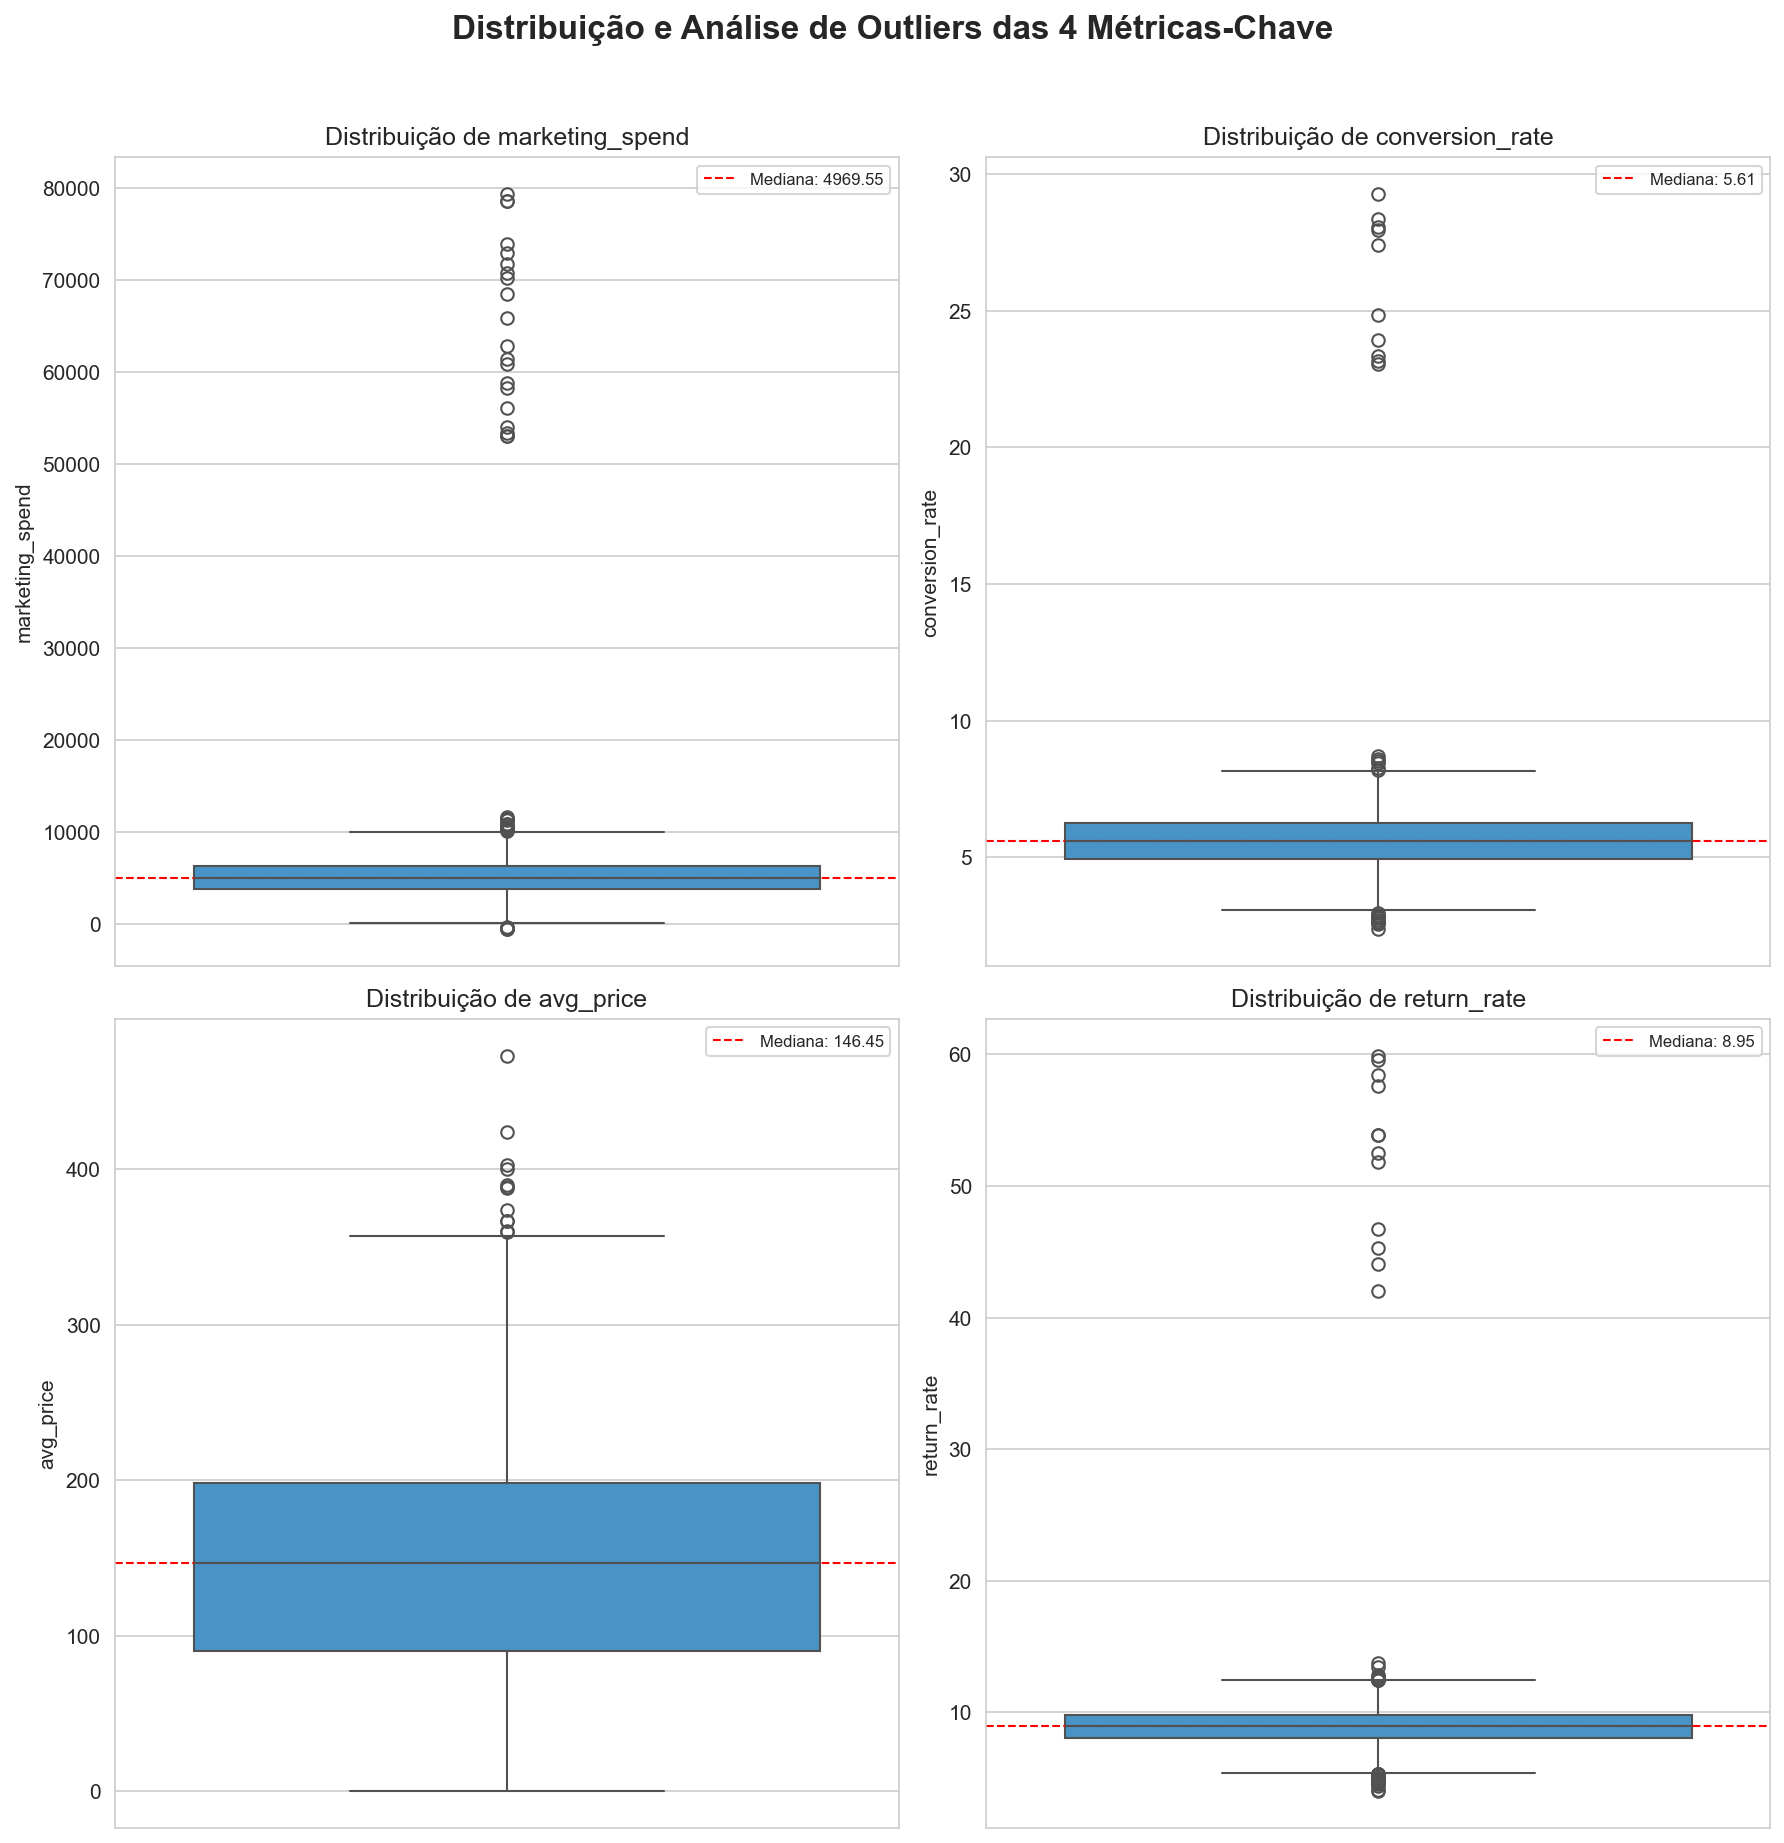

In [352]:
cols_to_impute = ['marketing_spend', 'conversion_rate', 'avg_price', 'return_rate']
for col in cols_to_impute:
    df_ecommerce[col].fillna(df_ecommerce[col].median(), inplace=True)
    
# --- 3. GERAÇÃO DOS GRÁFICOS (CÓDIGO OTIMIZADO) ---
key_numerical_cols = ['marketing_spend', 'conversion_rate', 'avg_price', 'return_rate']

plt.figure(figsize=(12, 12))
plt.suptitle('Distribuição e Análise de Outliers das 4 Métricas-Chave', fontsize=16, fontweight='bold', y=1.02)

for i, col in enumerate(key_numerical_cols):
    
    # Box Plot Único e Consolidado (Mais Simples)
    plt.subplot(2, 2, i + 1)
    # Garante que apenas dados válidos sejam usados
    data_to_plot = df_ecommerce[col].dropna() 
    
    sns.boxplot(y=data_to_plot, color='#3498db')
    
    # Título do gráfico (explicativo)
    plt.title(f'Distribuição de {col}', fontsize=12)
    plt.ylabel(col)
    
    # Adiciona a mediana como referência
    median_val = data_to_plot.median()
    # Adiciona um rótulo com o valor exato da mediana no Box Plot
    plt.axhline(median_val, color='red', linestyle='--', linewidth=1, label=f'Mediana: {median_val:.2f}')
    plt.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

## 7 - Análise Univariada - Variáveis Categóricas

Vamos explorar a distribuição e estatísticas descritivas das variáveis categóricas, usando gráficos de contagem para entender a frequência de cada categoria.

Iniciando a análise univariada das variáveis categóricas.


--- Análise para a coluna: product_category ---
Contagem de Valores (Value Counts):


product_category
Fashion           729
Electronics       633
Home              501
Books             378
Sports            234
  Fashion           7
  Home              5
FASHION             4
ELECTRONICS         3
BOOKS               3
HOME                3
  Electronics       3
  Books             3
  Sports            2
SPORTS              2
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13636\4145677658.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_ecommerce[col], order=df_ecommerce[col].value_counts().index, palette='viridis')


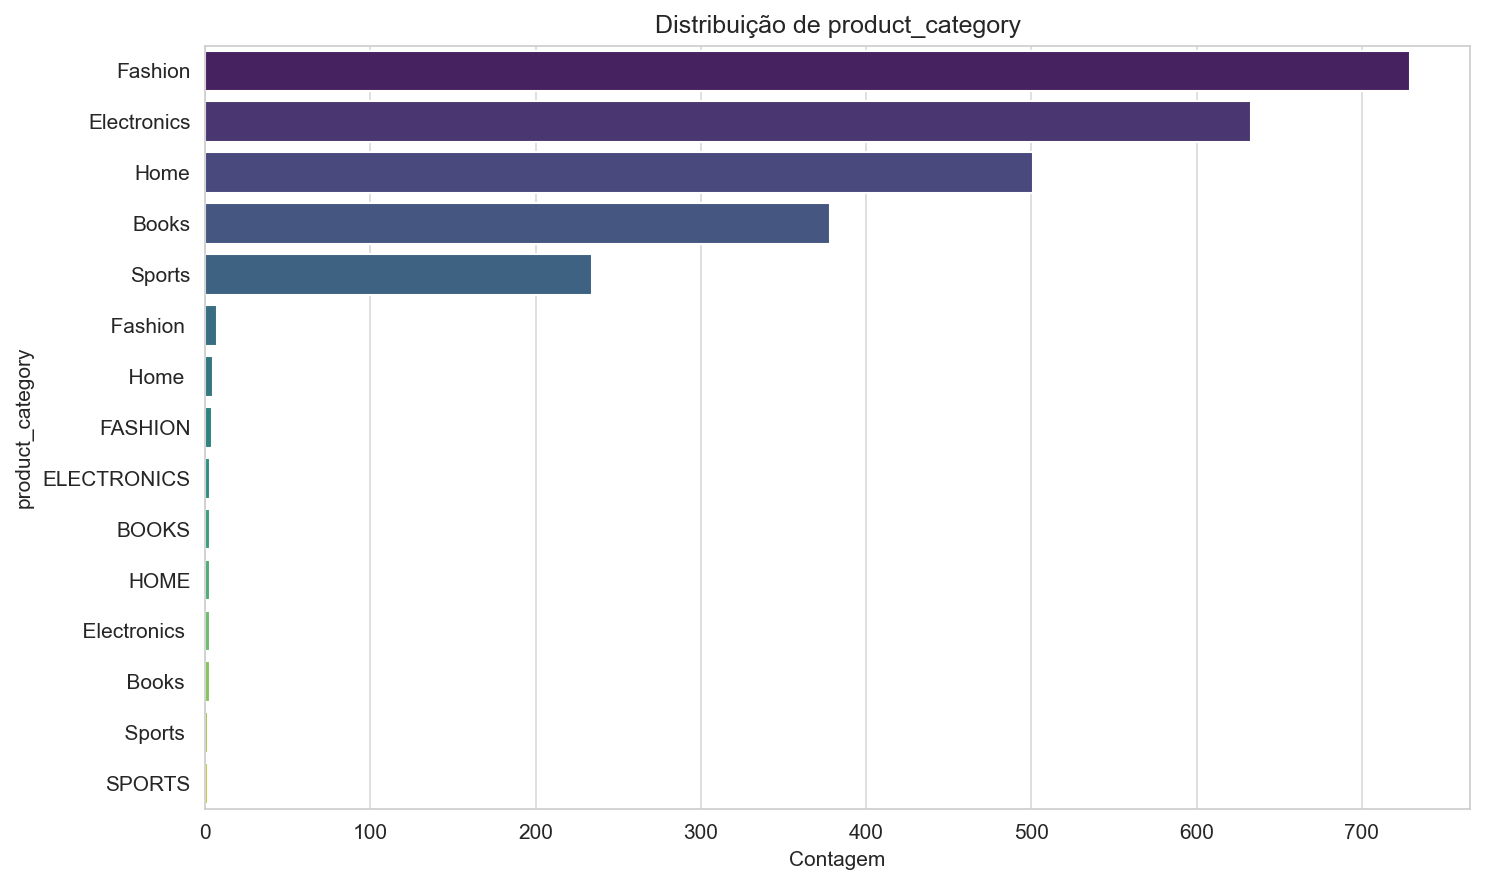

--------------------------------------------------

--- Análise para a coluna: competition_level ---
Contagem de Valores (Value Counts):


competition_level
Medium       1245
High          747
Low           483
MEDIUM          9
  High          9
  Medium        8
LOW             3
  Low           3
HIGH            3
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13636\4145677658.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_ecommerce[col], order=df_ecommerce[col].value_counts().index, palette='viridis')


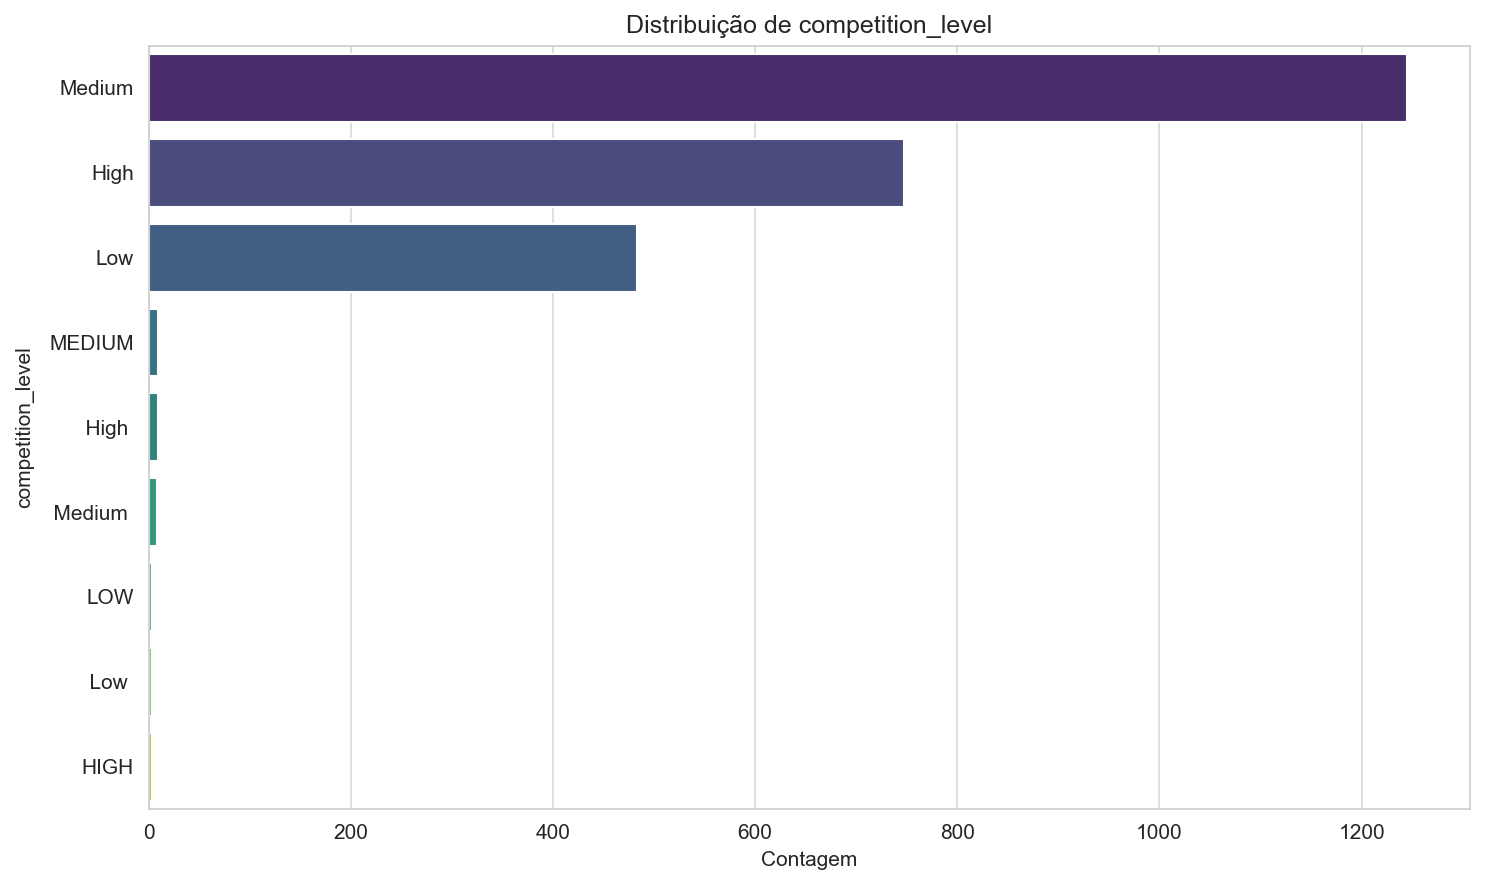

--------------------------------------------------

--- Análise para a coluna: seasonality ---
Contagem de Valores (Value Counts):


seasonality
Medium       1189
Low           759
High          527
  Medium       10
MEDIUM          7
LOW             6
  High          5
  Low           5
HIGH            1
  LOW           1
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13636\4145677658.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_ecommerce[col], order=df_ecommerce[col].value_counts().index, palette='viridis')


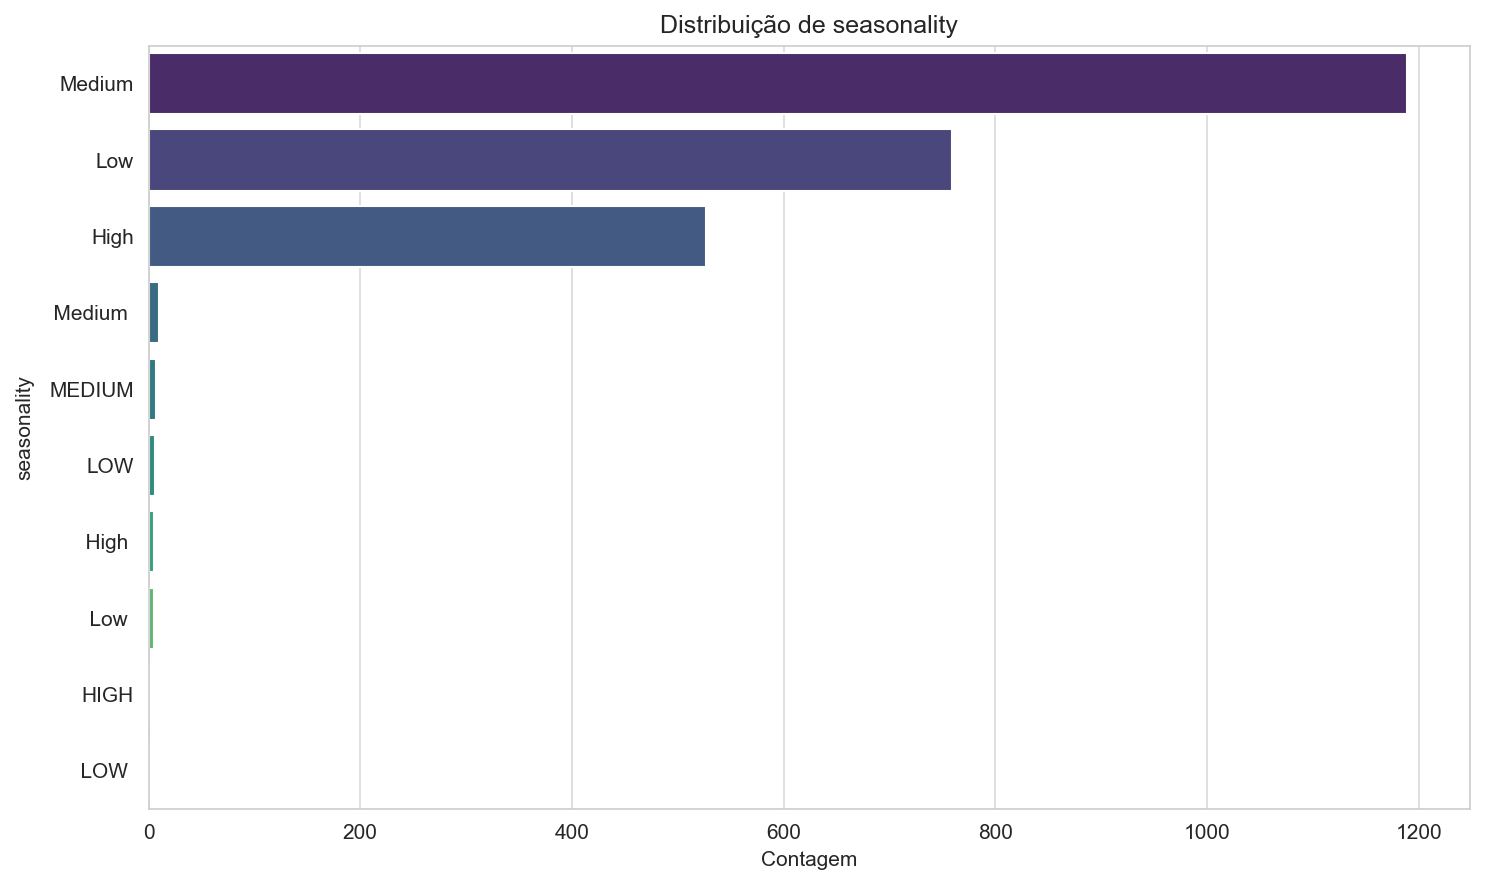

--------------------------------------------------

--- Análise para a coluna: free_shipping ---
Contagem de Valores (Value Counts):


free_shipping
Yes       1450
No        1026
  No        10
  Yes        9
YES          9
NO           5
  YES        1
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13636\4145677658.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_ecommerce[col], order=df_ecommerce[col].value_counts().index, palette='viridis')


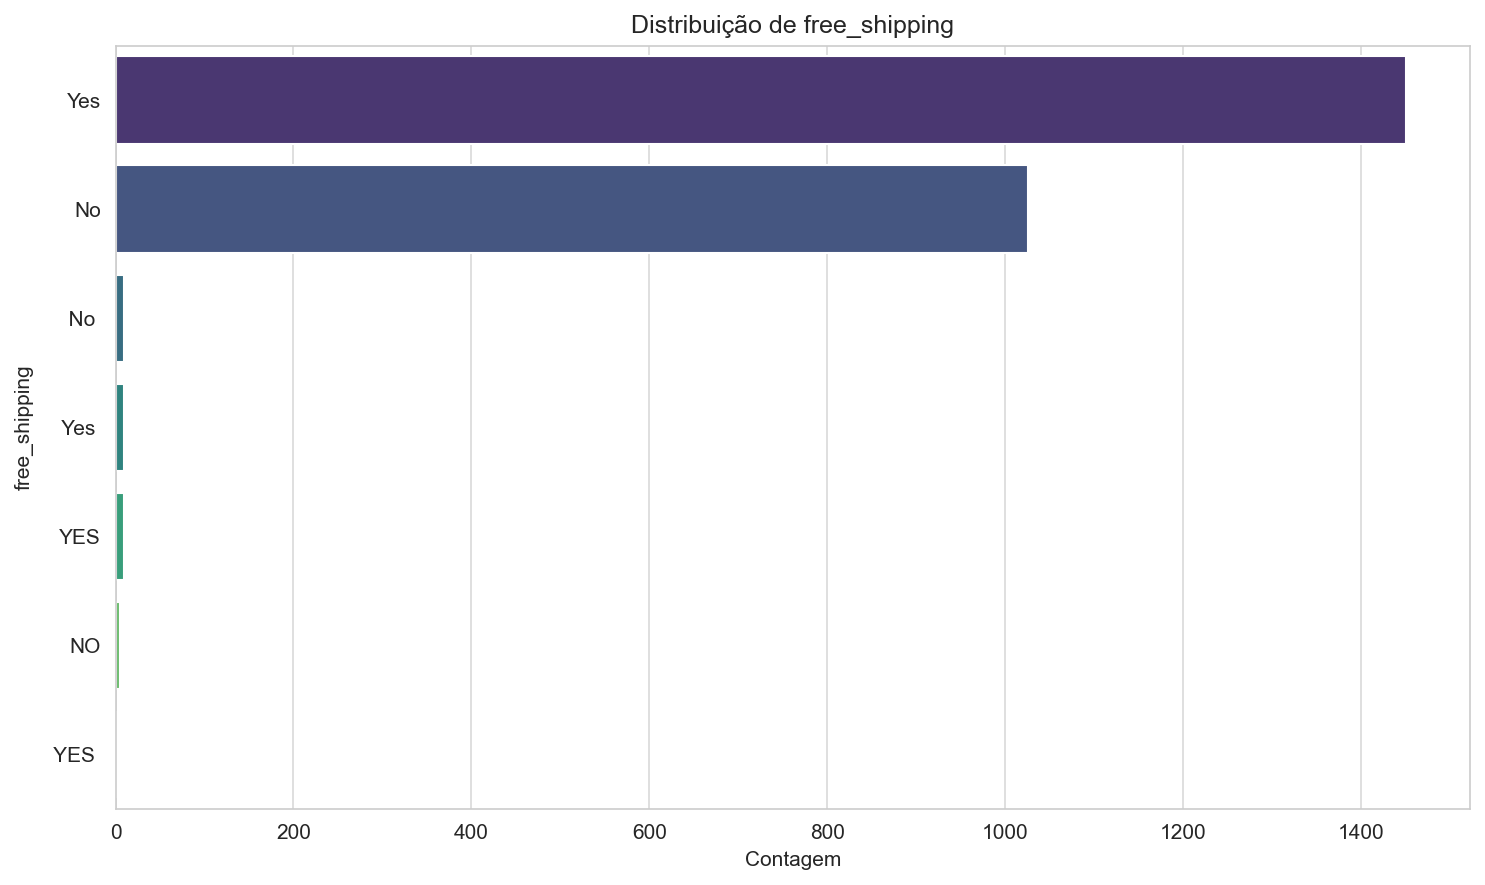

--------------------------------------------------

--- Análise para a coluna: payment_methods ---
Contagem de Valores (Value Counts):


payment_methods
Debit Card          632
Credit Card         616
PayPal              614
Bank Transfer       613
  Bank Transfer       8
  Credit Card         6
  Debit Card          5
CREDIT CARD           4
DEBIT CARD            4
PAYPAL                4
BANK TRANSFER         3
  PayPal              1
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13636\4145677658.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_ecommerce[col], order=df_ecommerce[col].value_counts().index, palette='viridis')


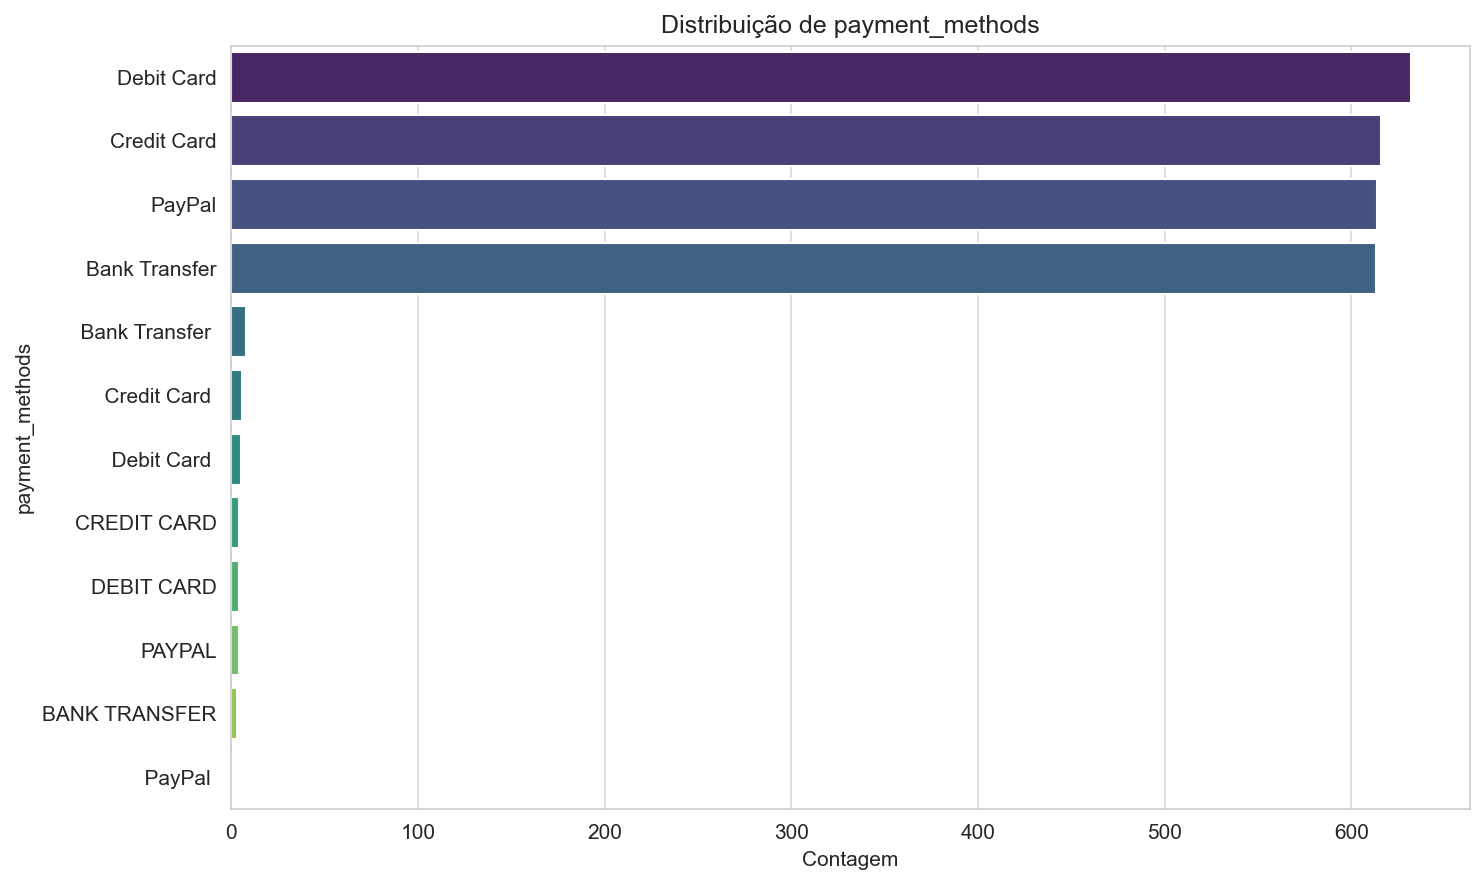

--------------------------------------------------


In [353]:

categorical_cols = df_ecommerce.select_dtypes(include='object').columns.tolist()

# Remover 'sale_id' da lista, pois é um identificador único e não uma variável categórica para análise de distribuição
if 'sale_id' in categorical_cols:
    categorical_cols.remove('sale_id')

print("Iniciando a análise univariada das variáveis categóricas.\n")

for col in categorical_cols:
    print(f"\n--- Análise para a coluna: {col} ---")
    print("Contagem de Valores (Value Counts):")
    display(df_ecommerce[col].value_counts())

    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_ecommerce[col], order=df_ecommerce[col].value_counts().index, palette='viridis')
    plt.title(f'Distribuição de {col}')
    plt.xlabel('Contagem')
    plt.ylabel(col)
    plt.grid(axis='x', alpha=0.75)
    plt.tight_layout()
    plt.show()
    print("--------------------------------------------------")

## 8- Análise de Correlações

Vamos calcular e visualizar a matriz de correlação entre as variáveis numéricas, especialmente em relação à variável alvo `monthly_sales`, usando um mapa de calor.

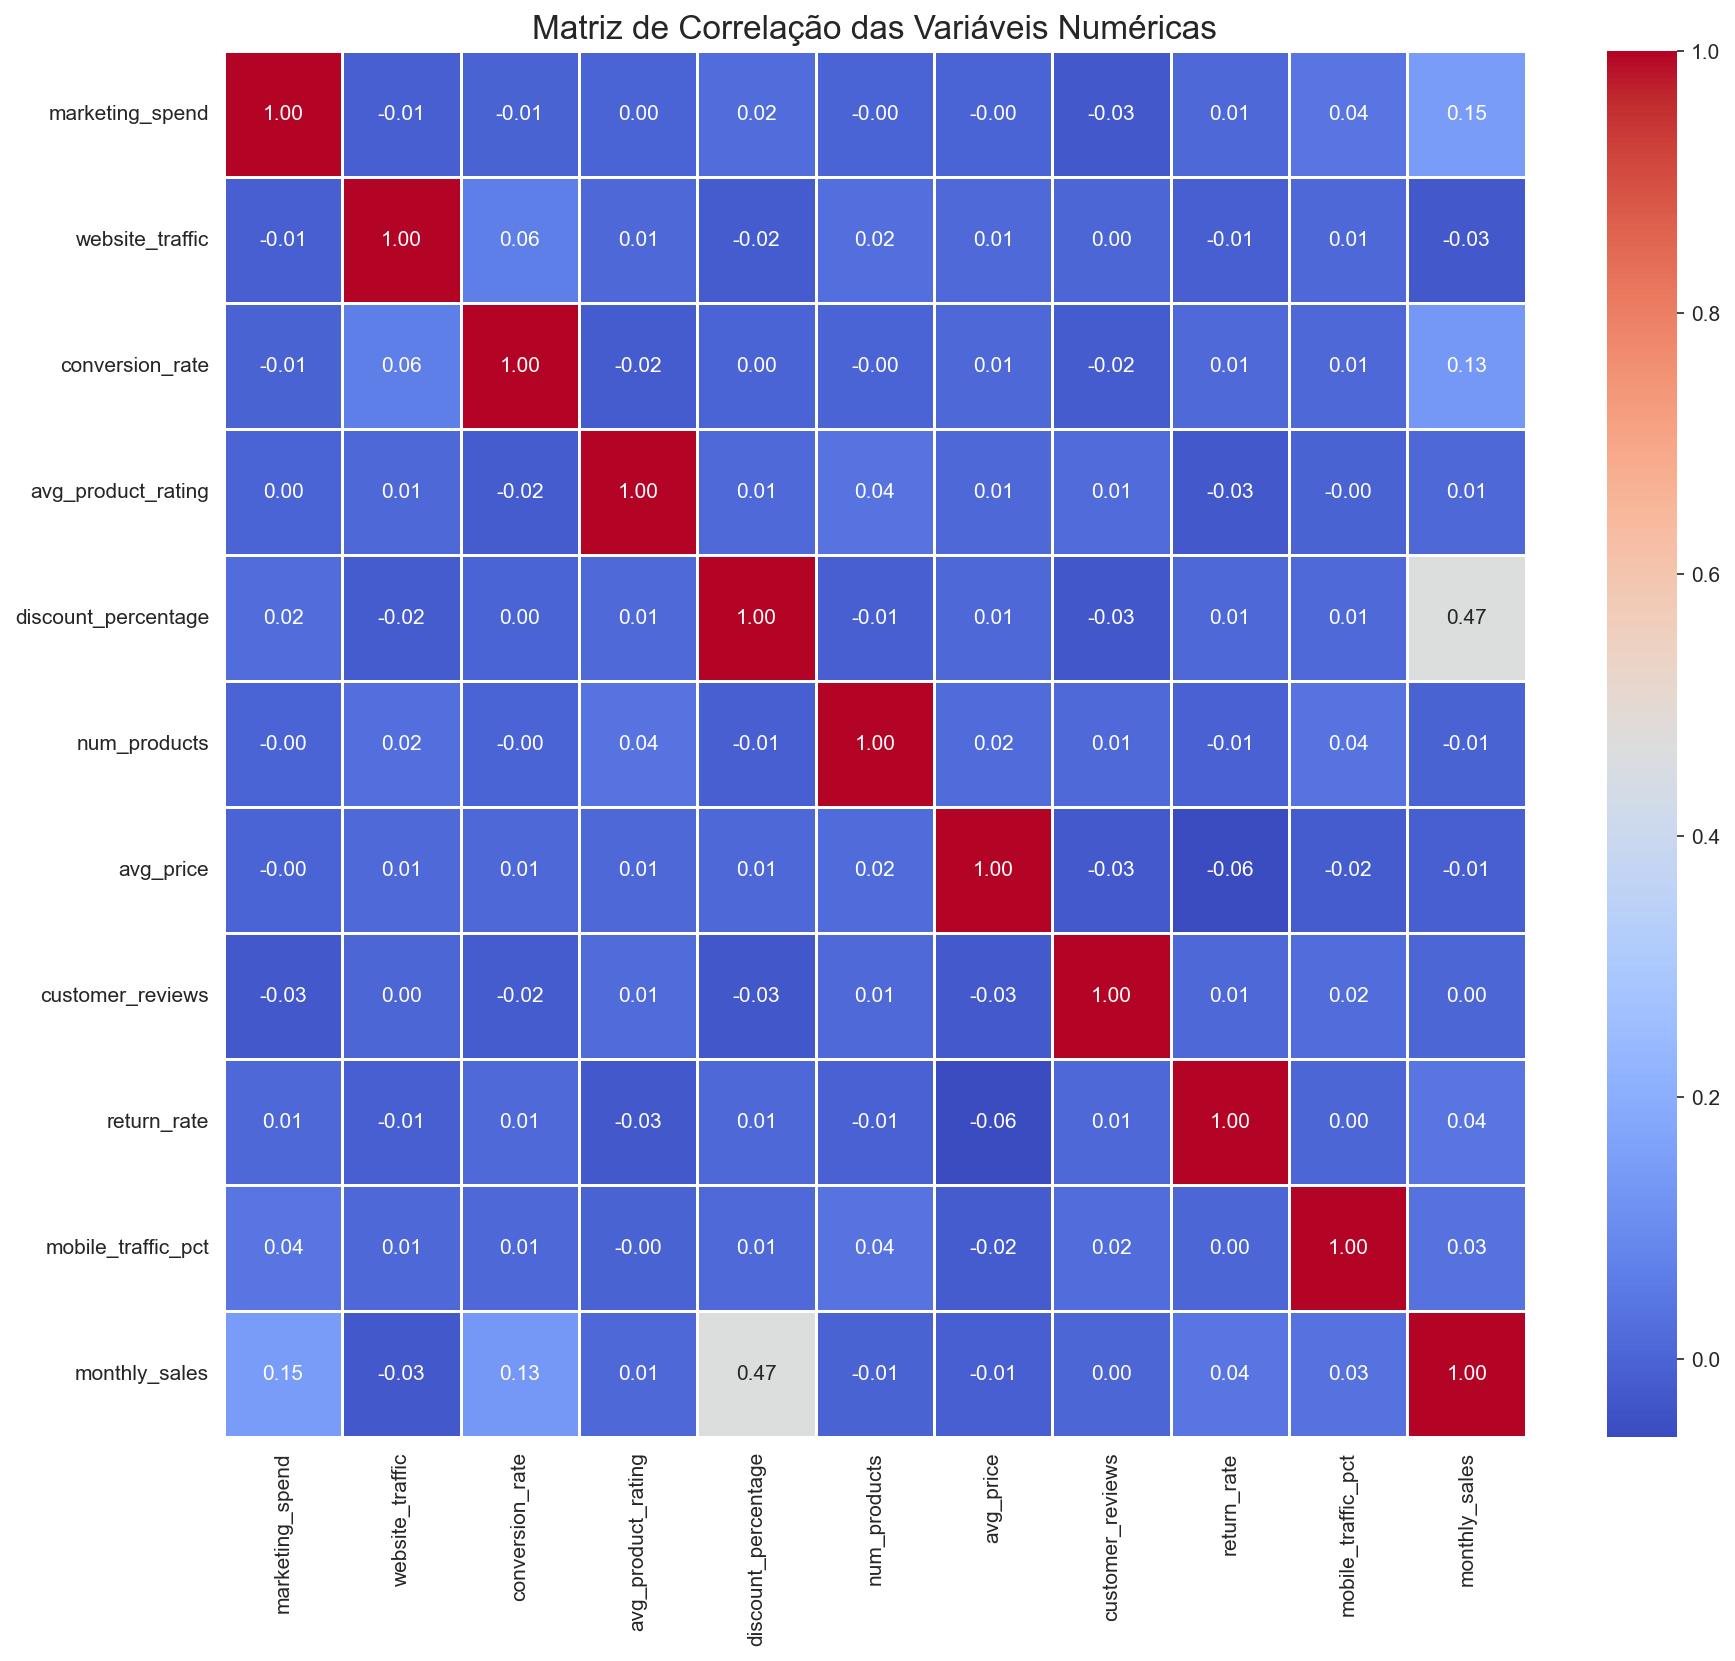

In [354]:
numerical_df = df_ecommerce.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()

## 10-Identificação de outliners

 utilizando o método IQR, as variáveis que apresentam outliers mais notáveis e que tem destaque são:

discount_percentage: Esta é a variável com a maior proporção de outliers, 19.88% (499 valores). Isso é um ponto muito importante, pois sugere que a empresa tem uma política de descontos bastante variada, com promoções que fogem significativamente do padrão comum. Seria interessante investigar se esses descontos atípicos (muito altos ou muito baixos) estão relacionados a eventos específicos, produtos ou estratégias de vendas.

marketing_spend: Apresenta 1.25% de outliers (29 valores). Isso indica que, ocasionalmente, há investimentos em marketing significativamente maiores ou menores do que o habitual. Compreender esses picos pode revelar campanhas de alto impacto ou momentos de menor investimento que afetaram as vendas.

return_rate: Possui 1.23% de outliers (28 valores). Isso significa que, em alguns períodos ou para certos produtos, as taxas de devolução foram incomumente altas ou baixas. Analisar esses casos pode ajudar a identificar problemas de qualidade do produto, descrição inadequada, ou até mesmo fraudes.

website_traffic: Foram identificados 0.98% de outliers (23 valores). Isso pode apontar para picos ou quedas atípicas no tráfego do site, que podem estar ligadas a eventos externos, campanhas de marketing pontuais ou problemas técnicos.

conversion_rate: Registra 0.73% de outliers (17 valores). Isso mostra alguns períodos com taxas de conversão excepcionalmente fora da faixa esperada, o que pode indicar tanto campanhas de sucesso estrondoso quanto problemas no funil de vendas.

Outras variáveis como avg_product_rating (0.63%), avg_price (0.48%) e mobile_traffic_pct (0.36%) também possuem outliers, mas em menor proporção. As variáveis num_products e customer_reviews não apresentaram outliers significativos pelo método IQR.

Destacar discount_percentage é fundamental, dada a alta porcentagem de outliers, pois pode revelar padrões de negócio ou exigir um tratamento específico em futuras análises ou modelos preditivos.

In [355]:
!git add notebooks/

fatal: pathspec 'notebooks/' did not match any files


# Etapa 2 — Pré-Processamento dos Dados

Nesta etapa realizamos:

1. Tratamento de valores faltantes  
2. Tratamento de outliers das principais variáveis  
3. Encoding de variáveis categóricas  


# CÉLULA 1: IMPORTAÇÃO DE BIBLIOTECAS E CONFIGURAÇÕES

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import joblib
import os

# Configurações de estilo
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)


# CÉLULA 2: CARREGAMENTO E VISUALIZAÇÃO INICIAL DOS DADOS

In [357]:
print("1. CARREGANDO E VISUALIZANDO OS DADOS...")

# Carregar dados
df = pd.read_csv('ecommerce_sales.csv')
print(f"📊 Dataset original: {df.shape[0]} linhas × {df.shape[1]} colunas")

# Visualizar primeiras linhas
print("\n🔍 Primeiras 5 linhas do dataset:")
display(df.head())

1. CARREGANDO E VISUALIZANDO OS DADOS...
📊 Dataset original: 2510 linhas × 17 colunas

🔍 Primeiras 5 linhas do dataset:


,sale_id,marketing_spend,website_traffic,conversion_rate,avg_product_rating,discount_percentage,num_products,avg_price,customer_reviews,return_rate,product_category,competition_level,seasonality,free_shipping,payment_methods,mobile_traffic_pct,monthly_sales
0,SALE00022,5736.77,15473.0,5.05,2.34,25,90,129.97,795.0,10.48,Fashion,Medium,Low,No,Credit Card,64.76,8302.85
1,SALE00633,6553.71,16501.0,7.33,3.58,10,37,118.24,956.0,NaN,Fashion,Medium,Medium,Yes,PayPal,69.99,8460.42
2,SALE01551,NaN,12624.0,5.82,2.56,15,499,97.37,635.0,NaN,Home,Medium,High,Yes,PayPal,79.56,7493.05
3,SALE00391,7141.07,21362.0,4.82,2.90,20,128,64.31,794.0,11.13,Home,Medium,Low,Yes,Bank Transfer,82.55,8258.81
4,SALE00375,1232.50,17901.0,4.01,3.66,0,429,161.47,933.0,10.17,Fashion,Medium,High,No,Credit Card,66.19,6151.35


# CÉLULA 3: ANÁLISE VISUAL DE VALORES FALTANTES

2. ANÁLISE DETALHADA DE VALORES FALTANTES


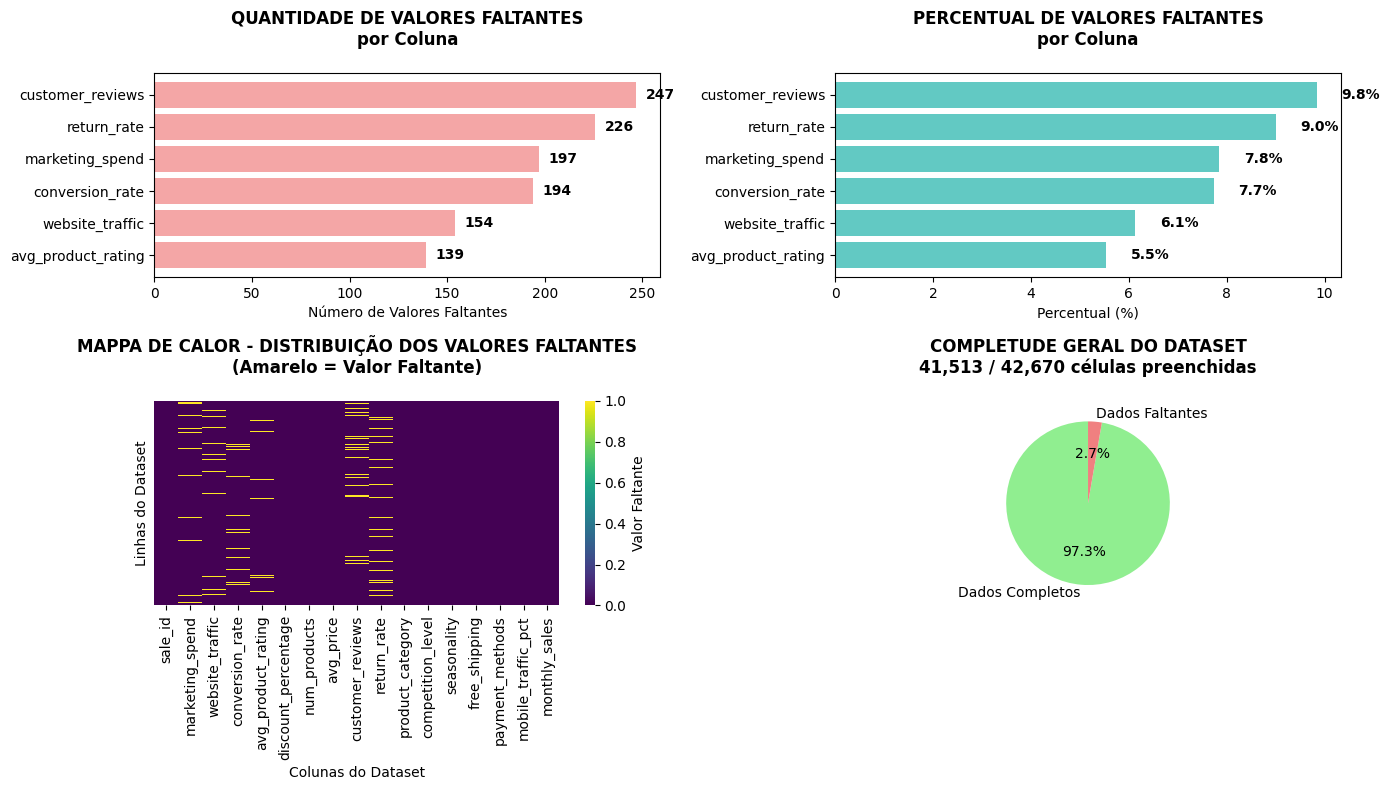


📋 RESUMO DETALHADO DE VALORES FALTANTES:


,Valores_Faltantes,Percentual_Faltante,Valores_Preenchidos,Percentual_Preenchido
customer_reviews,247,9.840637,2263,90.159363
return_rate,226,9.003984,2284,90.996016
marketing_spend,197,7.848606,2313,92.151394
conversion_rate,194,7.729084,2316,92.270916
website_traffic,154,6.135458,2356,93.864542
avg_product_rating,139,5.537849,2371,94.462151


In [358]:
print("2. ANÁLISE DETALHADA DE VALORES FALTANTES")

# Calcular estatísticas de valores faltantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Criar visualização completa
plt.figure(figsize=(14, 8))

# Gráfico 1: Quantidade absoluta de valores faltantes
plt.subplot(2, 2, 1)
missing_abs = missing_data[missing_data > 0].sort_values(ascending=True)
bars1 = plt.barh(range(len(missing_abs)), missing_abs.values, color='lightcoral', alpha=0.7)
plt.title('QUANTIDADE DE VALORES FALTANTES\npor Coluna', fontweight='bold', pad=20)
plt.xlabel('Número de Valores Faltantes')
plt.yticks(range(len(missing_abs)), missing_abs.index)

# Adicionar valores nas barras
for i, bar in enumerate(bars1):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', ha='left', va='center', fontweight='bold')

# Gráfico 2: Percentual de valores faltantes
plt.subplot(2, 2, 2)
missing_pct = missing_percent[missing_percent > 0].sort_values(ascending=True)
bars2 = plt.barh(range(len(missing_pct)), missing_pct.values, color='lightseagreen', alpha=0.7)
plt.title('PERCENTUAL DE VALORES FALTANTES\npor Coluna', fontweight='bold', pad=20)
plt.xlabel('Percentual (%)')
plt.yticks(range(len(missing_pct)), missing_pct.index)

# Adicionar valores nas barras
for i, bar in enumerate(bars2):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', ha='left', va='center', fontweight='bold')

# Gráfico 3: Mapa de calor dos valores faltantes
plt.subplot(2, 2, 3)
missing_matrix = df.isnull()
sns.heatmap(missing_matrix, cbar=True, cmap='viridis',
            yticklabels=False, cbar_kws={'label': 'Valor Faltante'})
plt.title('MAPPA DE CALOR - DISTRIBUIÇÃO DOS VALORES FALTANTES\n(Amarelo = Valor Faltante)',
          fontweight='bold', pad=20)
plt.xlabel('Colunas do Dataset')
plt.ylabel('Linhas do Dataset')

# Gráfico 4: Resumo estatístico
plt.subplot(2, 2, 4)
total_missing = missing_data.sum()
total_cells = df.shape[0] * df.shape[1]
pct_complete = ((total_cells - total_missing) / total_cells) * 100

labels = ['Dados Completos', 'Dados Faltantes']
sizes = [pct_complete, 100 - pct_complete]
colors = ['lightgreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title(f'COMPLETUDE GERAL DO DATASET\n{total_cells - total_missing:,} / {total_cells:,} células preenchidas',
          fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Tabela resumo
print("\n📋 RESUMO DETALHADO DE VALORES FALTANTES:")
missing_info = pd.DataFrame({
    'Valores_Faltantes': missing_data[missing_data > 0],
    'Percentual_Faltante': missing_percent[missing_data > 0],
    'Valores_Preenchidos': df.shape[0] - missing_data[missing_data > 0],
    'Percentual_Preenchido': 100 - missing_percent[missing_data > 0]
}).sort_values('Valores_Faltantes', ascending=False)

display(missing_info)

# CÉLULA 4: TRATAMENTO DE VALORES FALTANTES

🎯 Estratégia de Imputação:
    • Colunas numéricas: Mediana (robusta a outliers)
    • Colunas categóricas: Moda (valor mais frequente)


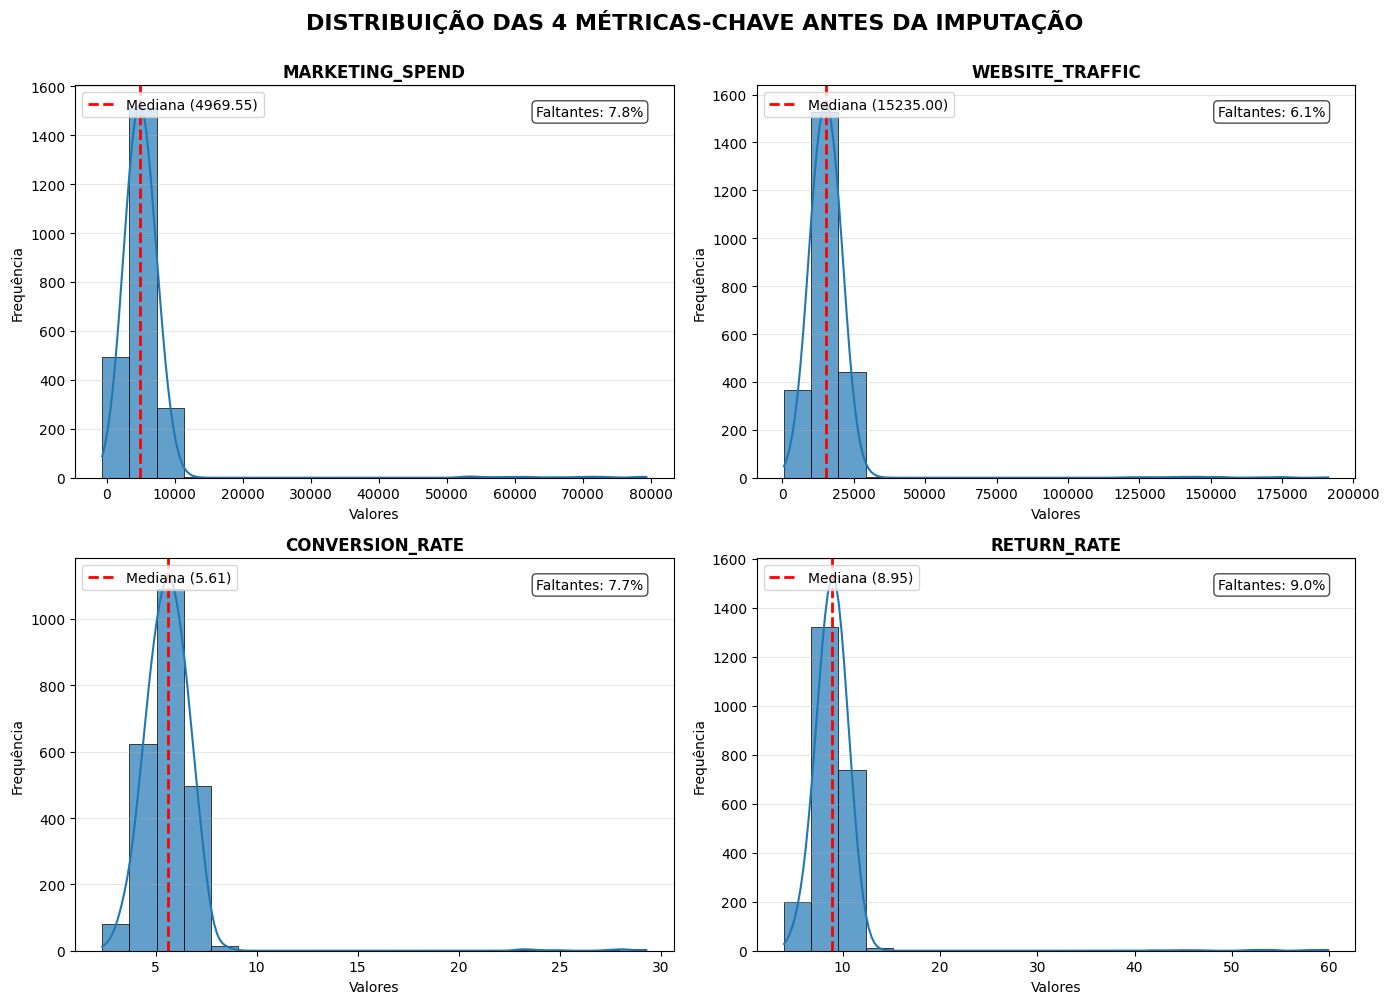


📊 VALORES FALTANTES TOTAIS NO DATAFRAME (ANTES da Imputação): 1157


In [359]:
cols_com_faltantes_chave = ['marketing_spend', 'website_traffic', 'conversion_rate', 'return_rate']

print("🎯 Estratégia de Imputação:")
print("    • Colunas numéricas: Mediana (robusta a outliers)")
print("    • Colunas categóricas: Moda (valor mais frequente)")

# Geração da figura consolidada (layout 2x2 mais limpo)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('DISTRIBUIÇÃO DAS 4 MÉTRICAS-CHAVE ANTES DA IMPUTAÇÃO',
             fontsize=16, fontweight='bold', y=1.00)

for i, col in enumerate(cols_com_faltantes_chave):
    if col in df.columns:
        # Dados não-nulos para calcular estatísticas
        dados_completos = df[col].dropna()
        n_faltantes = df[col].isnull().sum()
        pct_faltantes = (n_faltantes / len(df)) * 100
        mediana = dados_completos.median()

        ax = axes[i//2, i%2]
        
        # Histograma (Visual mais simples e limpo)
        sns.histplot(dados_completos, bins=20, ax=ax, kde=True, color='#1f77b4', 
                     edgecolor='black', linewidth=0.5, alpha=0.7)
        
        # Linha Vertical da MEDIANA (Diretamente liga o gráfico à estratégia!)
        ax.axvline(mediana, color='red', linestyle='--', linewidth=2, label=f'Mediana ({mediana:.2f})')
        
        # Título Explicativo Conciso
        ax.set_title(f'{col.upper()}', fontweight='bold', fontsize=12)
        
        # Adiciona a porcentagem de faltantes no canto superior para contexto
        ax.text(0.95, 0.95, f'Faltantes: {pct_faltantes:.1f}%', transform=ax.transAxes,
                horizontalalignment='right', verticalalignment='top', fontsize=10, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
        
        ax.set_xlabel('Valores')
        ax.set_ylabel('Frequência')
        ax.legend(loc='upper left')
        ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Verificação
print(f"\n📊 VALORES FALTANTES TOTAIS NO DATAFRAME (ANTES da Imputação): {df.isnull().sum().sum()}")

# CÉLULA 5: ANÁLISE DETALHADA DE OUTLIERS

✅ DataFrame 'df_clean' criado com 0 valores faltantes.
---------------------------------------------------------------------------------
4. ANÁLISE DETALHADA DE OUTLIERS
🔍 Analisando outliers em cada coluna...

📈 ANALISANDO: DISCOUNT_PERCENTAGE


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13636\3421652635.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13636\3421652635.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

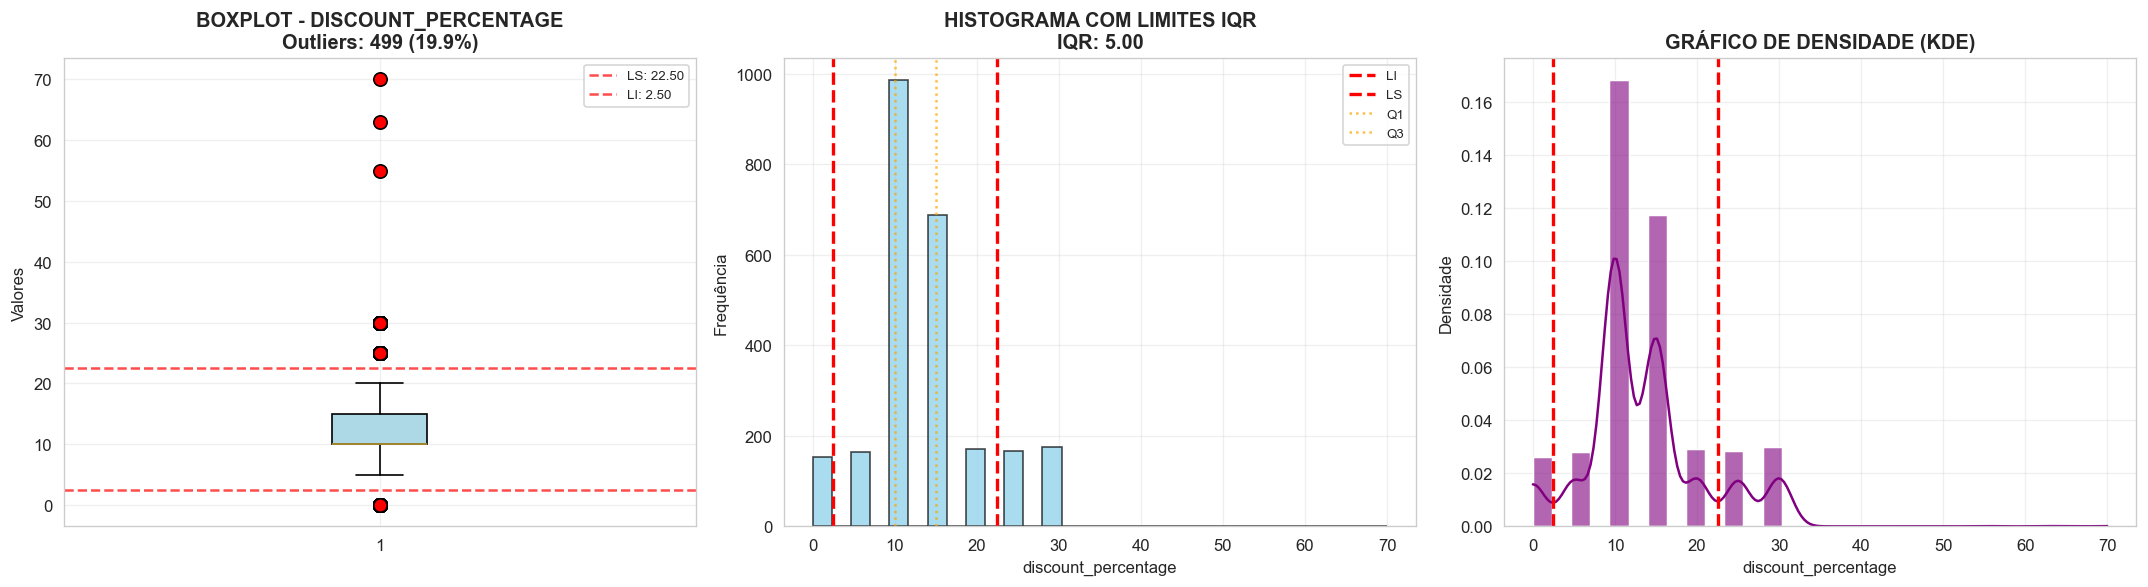


📈 ANALISANDO: MARKETING_SPEND


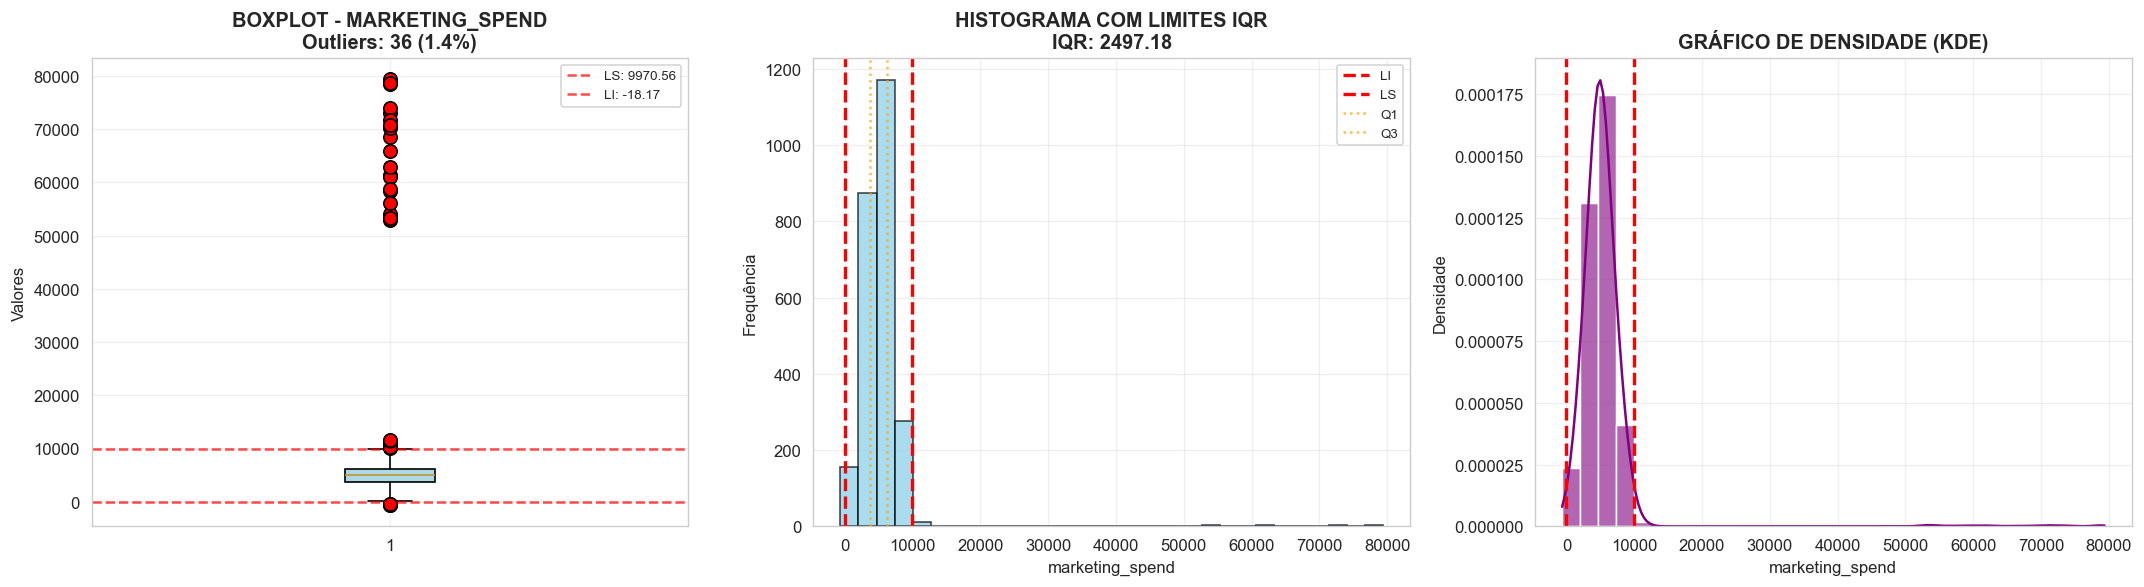


📈 ANALISANDO: RETURN_RATE


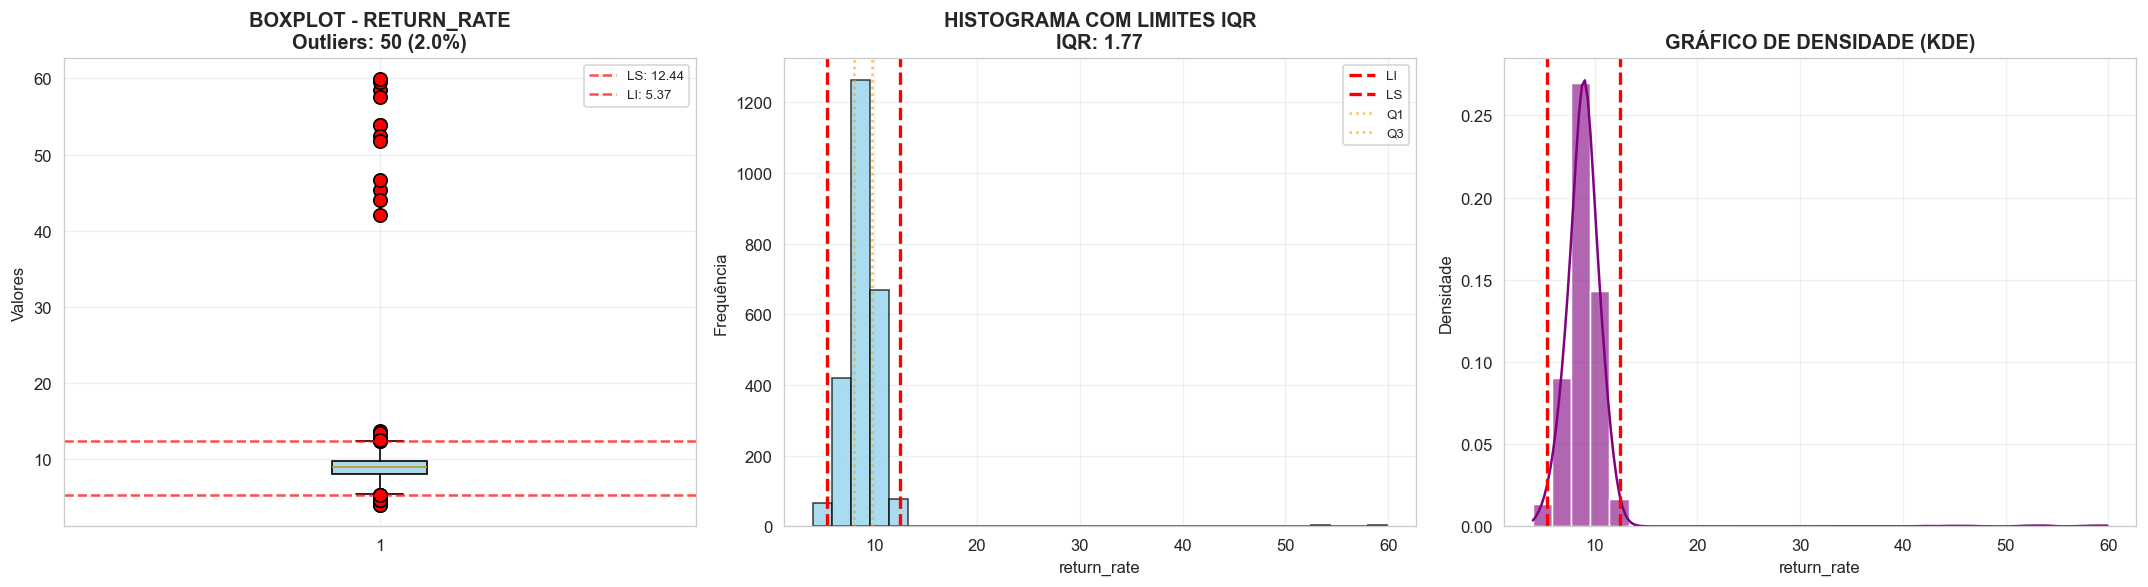


📈 ANALISANDO: WEBSITE_TRAFFIC


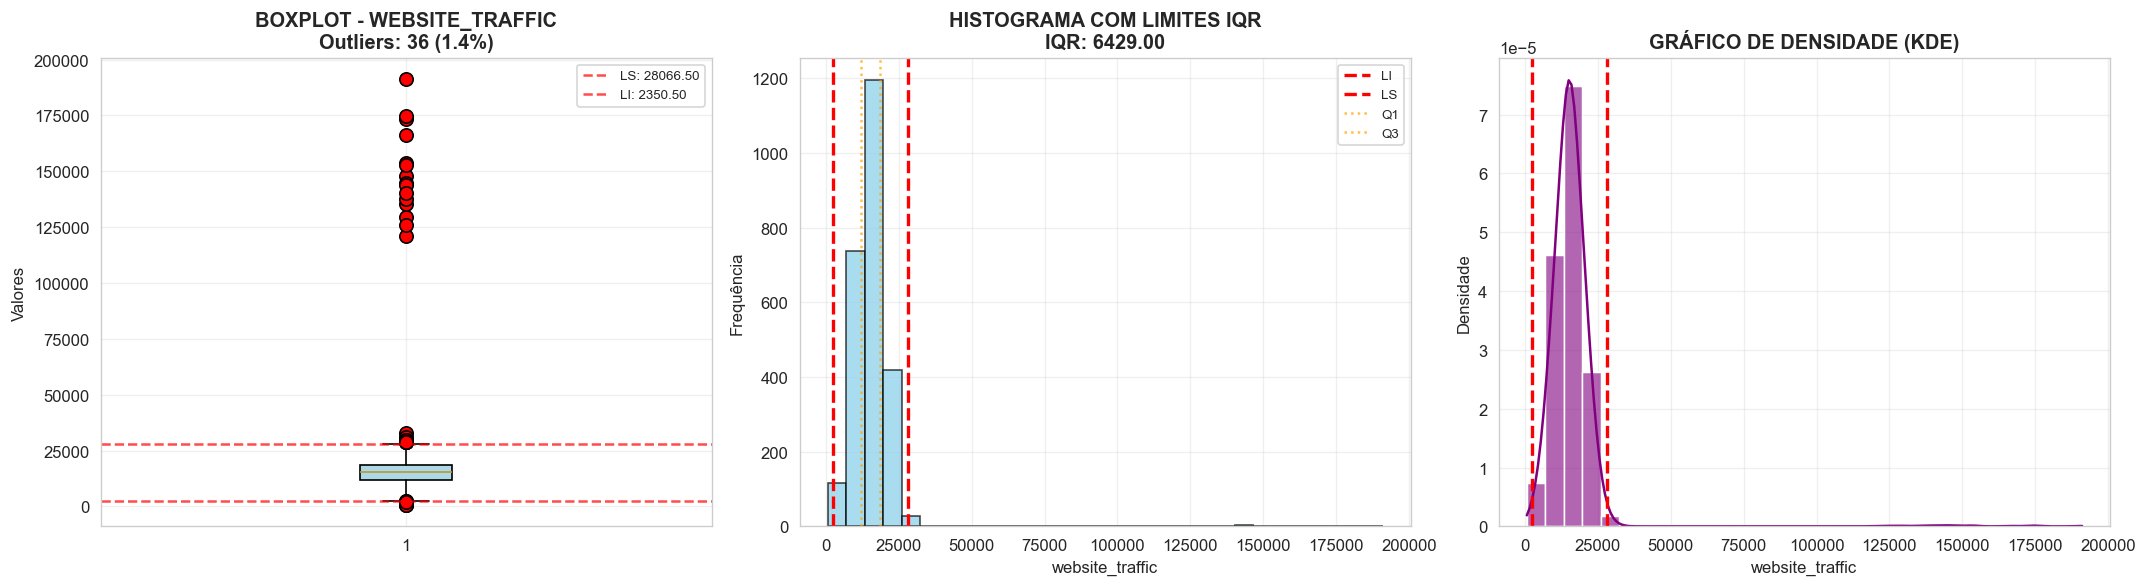


📈 ANALISANDO: CONVERSION_RATE


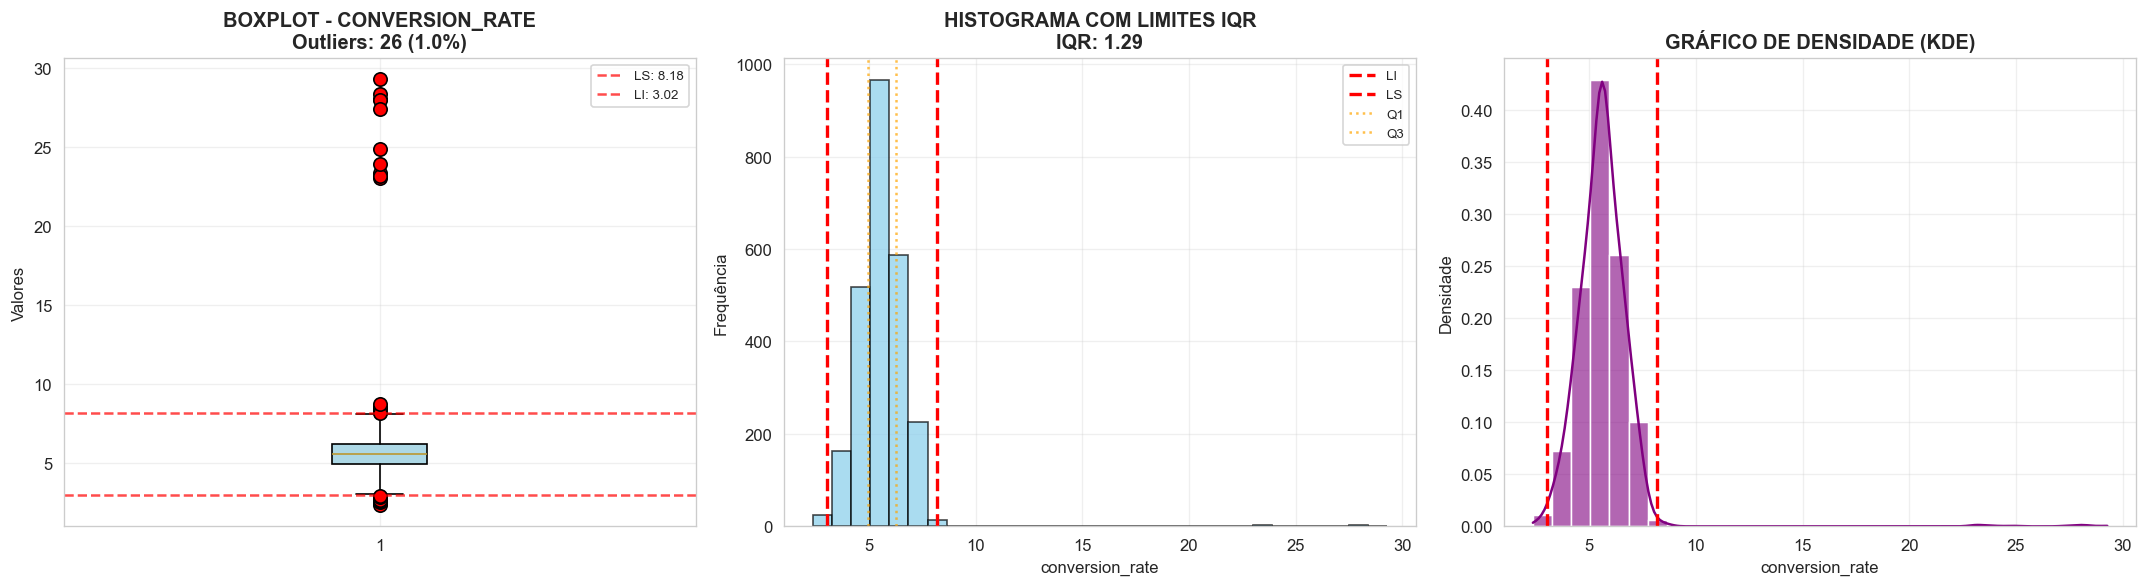


📋 RESUMO DA ANÁLISE DE OUTLIERS:


,Coluna,Outliers_Identificados,Percentual_Outliers,Limite_Inferior,Limite_Superior,Valor_Minimo_Real,Valor_Maximo_Real
0,discount_percentage,499,19.88%,2.50,22.50,0.00,70.00
1,marketing_spend,36,1.43%,-18.17,9970.56,-631.01,79343.50
2,return_rate,50,1.99%,5.37,12.44,3.99,59.89
3,website_traffic,36,1.43%,2350.50,28066.50,579.00,191152.00
4,conversion_rate,26,1.04%,3.02,8.18,2.36,29.28


In [360]:
# --- 1. CONFIGURAÇÃO E CRIAÇÃO DO DF_CLEAN (ETAPAS NECESSÁRIAS) ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo e resolução para melhor visualização
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (18, 5) # Tamanho padrão para os 3 gráficos

# Carrega o DataFrame original
try:
    df = pd.read_csv('ecommerce_sales.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'ecommerce_sales.csv' não foi encontrado.")
    raise

# Cria o DF limpo (df_clean) para a análise
df_clean = df.copy() 

# --- Imputação de Valores Faltantes (Criação do df_clean) ---
num_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_clean.select_dtypes(include="object").columns.tolist()

for col in num_cols:
    if df_clean[col].isnull().any():
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

for col in cat_cols:
    if df_clean[col].isnull().any():
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

print(f"✅ DataFrame 'df_clean' criado com {df_clean.isnull().sum().sum()} valores faltantes.")
print("---------------------------------------------------------------------------------")


# --- 2. FUNÇÃO E LOOP DE ANÁLISE DE OUTLIERS (SEU CÓDIGO) ---

print("4. ANÁLISE DETALHADA DE OUTLIERS")

def analise_outlier_detalhada(df, col):
    """Análise completa de outliers para uma coluna"""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df)) * 100

    # Criar visualização
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # BOXPLOT
    box = axes[0].boxplot(df[col], patch_artist=True)
    box['boxes'][0].set_facecolor('lightblue')
    box['fliers'][0].set_marker('o')
    box['fliers'][0].set_markerfacecolor('red')
    box['fliers'][0].set_markersize(8)
    axes[0].axhline(limite_superior, color='red', linestyle='--', alpha=0.7, label=f'LS: {limite_superior:.2f}')
    axes[0].axhline(limite_inferior, color='red', linestyle='--', alpha=0.7, label=f'LI: {limite_inferior:.2f}')
    axes[0].set_title(f'BOXPLOT - {col.upper()}\nOutliers: {n_outliers} ({pct_outliers:.1f}%)', fontweight='bold')
    axes[0].set_ylabel('Valores')
    axes[0].legend(fontsize=8)
    axes[0].grid(alpha=0.3)

    # HISTOGRAMA com limites
    axes[1].hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[1].axvline(limite_inferior, color='red', linestyle='--', linewidth=2, label='LI')
    axes[1].axvline(limite_superior, color='red', linestyle='--', linewidth=2, label='LS')
    axes[1].axvline(Q1, color='orange', linestyle=':', alpha=0.7, label='Q1')
    axes[1].axvline(Q3, color='orange', linestyle=':', alpha=0.7, label='Q3')
    axes[1].set_title(f'HISTOGRAMA COM LIMITES IQR\nIQR: {IQR:.2f}', fontweight='bold')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequência')
    axes[1].legend(fontsize=8)
    axes[1].grid(alpha=0.3)

    # GRÁFICO DE DENSIDADE (Ajustado para usar sns.histplot com densidade para ser mais limpo)
    sns.histplot(df[col], bins=30, ax=axes[2], kde=True, color='purple', stat='density', alpha=0.6)
    axes[2].axvline(limite_inferior, color='red', linestyle='--', linewidth=2)
    axes[2].axvline(limite_superior, color='red', linestyle='--', linewidth=2)
    axes[2].set_title('GRÁFICO DE DENSIDADE (KDE)', fontweight='bold')
    axes[2].set_xlabel(col)
    axes[2].set_ylabel('Densidade')
    axes[2].grid(alpha=0.3)


    plt.tight_layout()
    plt.show()

    return limite_inferior, limite_superior, n_outliers, pct_outliers

# Analisar outliers nas principais colunas
colunas_outliers = ['discount_percentage', 'marketing_spend', 'return_rate',
                    'website_traffic', 'conversion_rate']

info_outliers = []

print("🔍 Analisando outliers em cada coluna...")
for coluna in colunas_outliers:
    # A variável 'df_clean' agora existe!
    if coluna in df_clean.columns:
        print(f"\n📈 ANALISANDO: {coluna.upper()}")
        lim_inf, lim_sup, n_out, pct_out = analise_outlier_detalhada(df_clean, coluna)

        info_outliers.append({
            'Coluna': coluna,
            'Outliers_Identificados': n_out,
            'Percentual_Outliers': f'{pct_out:.2f}%',
            'Limite_Inferior': f'{lim_inf:.2f}',
            'Limite_Superior': f'{lim_sup:.2f}',
            'Valor_Minimo_Real': f'{df_clean[coluna].min():.2f}',
            'Valor_Maximo_Real': f'{df_clean[coluna].max():.2f}'
        })

# Resumo em tabela
print("\n📋 RESUMO DA ANÁLISE DE OUTLIERS:")
df_resumo_outliers = pd.DataFrame(info_outliers)
display(df_resumo_outliers)

# CÉLULA 6: TRATAMENTO DE OUTLIERS

5. TRATAMENTO DE OUTLIERS - APLICAÇÃO DO CAPPING
🔄 Aplicando capping nos outliers...
✅ discount_percentage: [2.50, 22.50]
✅ marketing_spend: [-18.17, 9970.56]
✅ return_rate: [5.37, 12.44]
✅ website_traffic: [2350.50, 28066.50]
✅ conversion_rate: [3.02, 8.18]

📊 COMPARAÇÃO: ANTES vs DEPOIS do tratamento de outliers


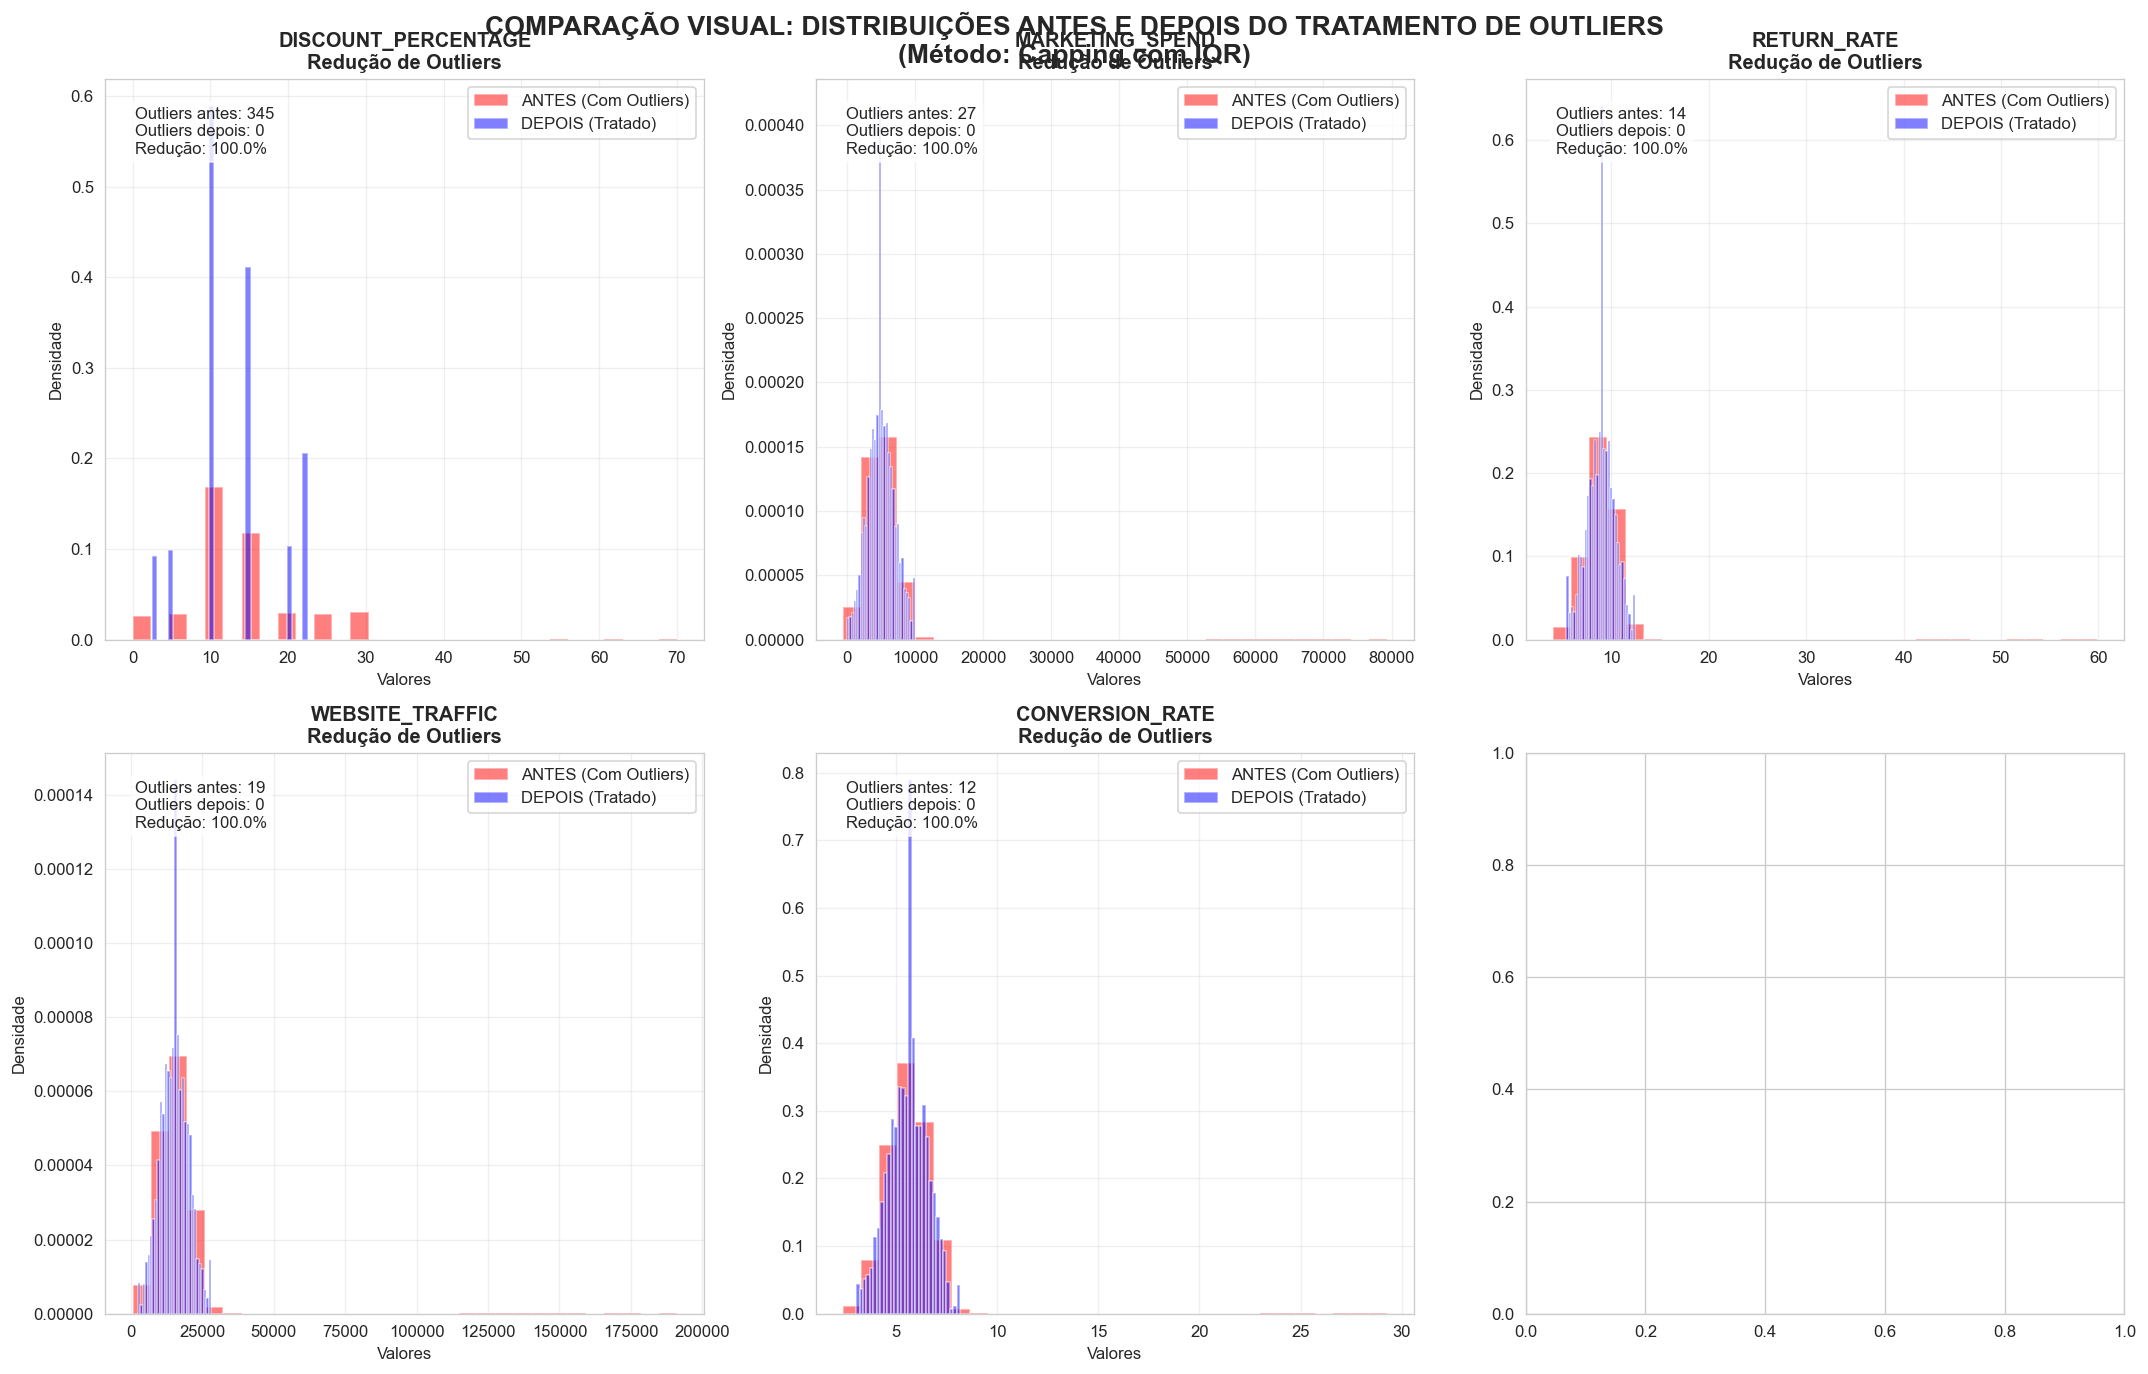


📋 RESUMO DO TRATAMENTO DE OUTLIERS:


,Coluna,Antes_Min,Antes_Max,Depois_Min,Depois_Max,Limite_Aplicado_Inferior,Limite_Aplicado_Superior
0,discount_percentage,0.00,70.00,2.50,22.50,2.50,22.50
1,marketing_spend,-631.01,79343.50,-18.17,9970.56,-18.17,9970.56
2,return_rate,3.99,59.89,5.37,12.44,5.37,12.44
3,website_traffic,579.00,191152.00,2350.50,28066.50,2350.50,28066.50
4,conversion_rate,2.36,29.28,3.02,8.18,3.02,8.18


In [361]:
print("5. TRATAMENTO DE OUTLIERS - APLICAÇÃO DO CAPPING")

def aplicar_capping(df, col):
    """Aplica capping nos outliers usando método IQR"""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Ajustar limites se necessário
    if limite_inferior < 0 and df[col].min() >= 0:
        limite_inferior = 0

    # Aplicar capping
    df[col] = np.clip(df[col], limite_inferior, limite_superior)
    return limite_inferior, limite_superior

print("🔄 Aplicando capping nos outliers...")

resultados_capping = []

for coluna in colunas_outliers:
    if coluna in df_clean.columns:
        lim_inf_antes = df_clean[coluna].min()
        lim_sup_antes = df_clean[coluna].max()

        # Aplicar capping
        novo_lim_inf, novo_lim_sup = aplicar_capping(df_clean, coluna)

        lim_inf_depois = df_clean[coluna].min()
        lim_sup_depois = df_clean[coluna].max()

        resultados_capping.append({
            'Coluna': coluna,
            'Antes_Min': f'{lim_inf_antes:.2f}',
            'Antes_Max': f'{lim_sup_antes:.2f}',
            'Depois_Min': f'{lim_inf_depois:.2f}',
            'Depois_Max': f'{lim_sup_depois:.2f}',
            'Limite_Aplicado_Inferior': f'{novo_lim_inf:.2f}',
            'Limite_Aplicado_Superior': f'{novo_lim_sup:.2f}'
        })

        print(f"✅ {coluna}: [{novo_lim_inf:.2f}, {novo_lim_sup:.2f}]")

# Visualizar resultados do tratamento
print("\n📊 COMPARAÇÃO: ANTES vs DEPOIS do tratamento de outliers")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('COMPARAÇÃO VISUAL: DISTRIBUIÇÕES ANTES E DEPOIS DO TRATAMENTO DE OUTLIERS\n(Método: Capping com IQR)',
             fontsize=16, fontweight='bold', y=0.95)

for i, coluna in enumerate(colunas_outliers[:6]):
    if coluna in df.columns and coluna in df_clean.columns:
        # Dados antes e depois
        dados_antes = df[coluna].dropna()
        dados_depois = df_clean[coluna]

        # Plot comparativo
        axes[i//3, i%3].hist(dados_antes, bins=30, alpha=0.5, color='red', label='ANTES (Com Outliers)', density=True)
        axes[i//3, i%3].hist(dados_depois, bins=30, alpha=0.5, color='blue', label='DEPOIS (Tratado)', density=True)
        axes[i//3, i%3].set_title(f'{coluna.upper()}\nRedução de Outliers', fontweight='bold')
        axes[i//3, i%3].set_xlabel('Valores')
        axes[i//3, i%3].set_ylabel('Densidade')
        axes[i//3, i%3].legend()
        axes[i//3, i%3].grid(alpha=0.3)

        # Calcular redução de outliers
        Q1 = dados_antes.quantile(0.25)
        Q3 = dados_antes.quantile(0.75)
        IQR = Q3 - Q1
        lim_sup_antes = Q3 + 1.5 * IQR
        outliers_antes = len(dados_antes[dados_antes > lim_sup_antes])
        outliers_depois = len(dados_depois[dados_depois > lim_sup_antes])

        reducao = ((outliers_antes - outliers_depois) / outliers_antes) * 100 if outliers_antes > 0 else 100

        # Adicionar texto informativo
        info_text = f'Outliers antes: {outliers_antes}\nOutliers depois: {outliers_depois}\nRedução: {reducao:.1f}%'
        axes[i//3, i%3].text(0.05, 0.95, info_text, transform=axes[i//3, i%3].transAxes,
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Tabela resumo do capping
print("\n📋 RESUMO DO TRATAMENTO DE OUTLIERS:")
df_resumo_capping = pd.DataFrame(resultados_capping)
display(df_resumo_capping)

# CÉLULA 7: ENCODING DE VARIÁVEIS CATEGÓRICAS

6. ENCODING DE VARIÁVEIS CATEGÓRICAS
🎯 Colunas categóricas para encoding: ['product_category', 'competition_level', 'seasonality', 'free_shipping', 'payment_methods']

📊 ANÁLISE DE CARDINALIDADE DAS VARIÁVEIS CATEGÓRICAS:


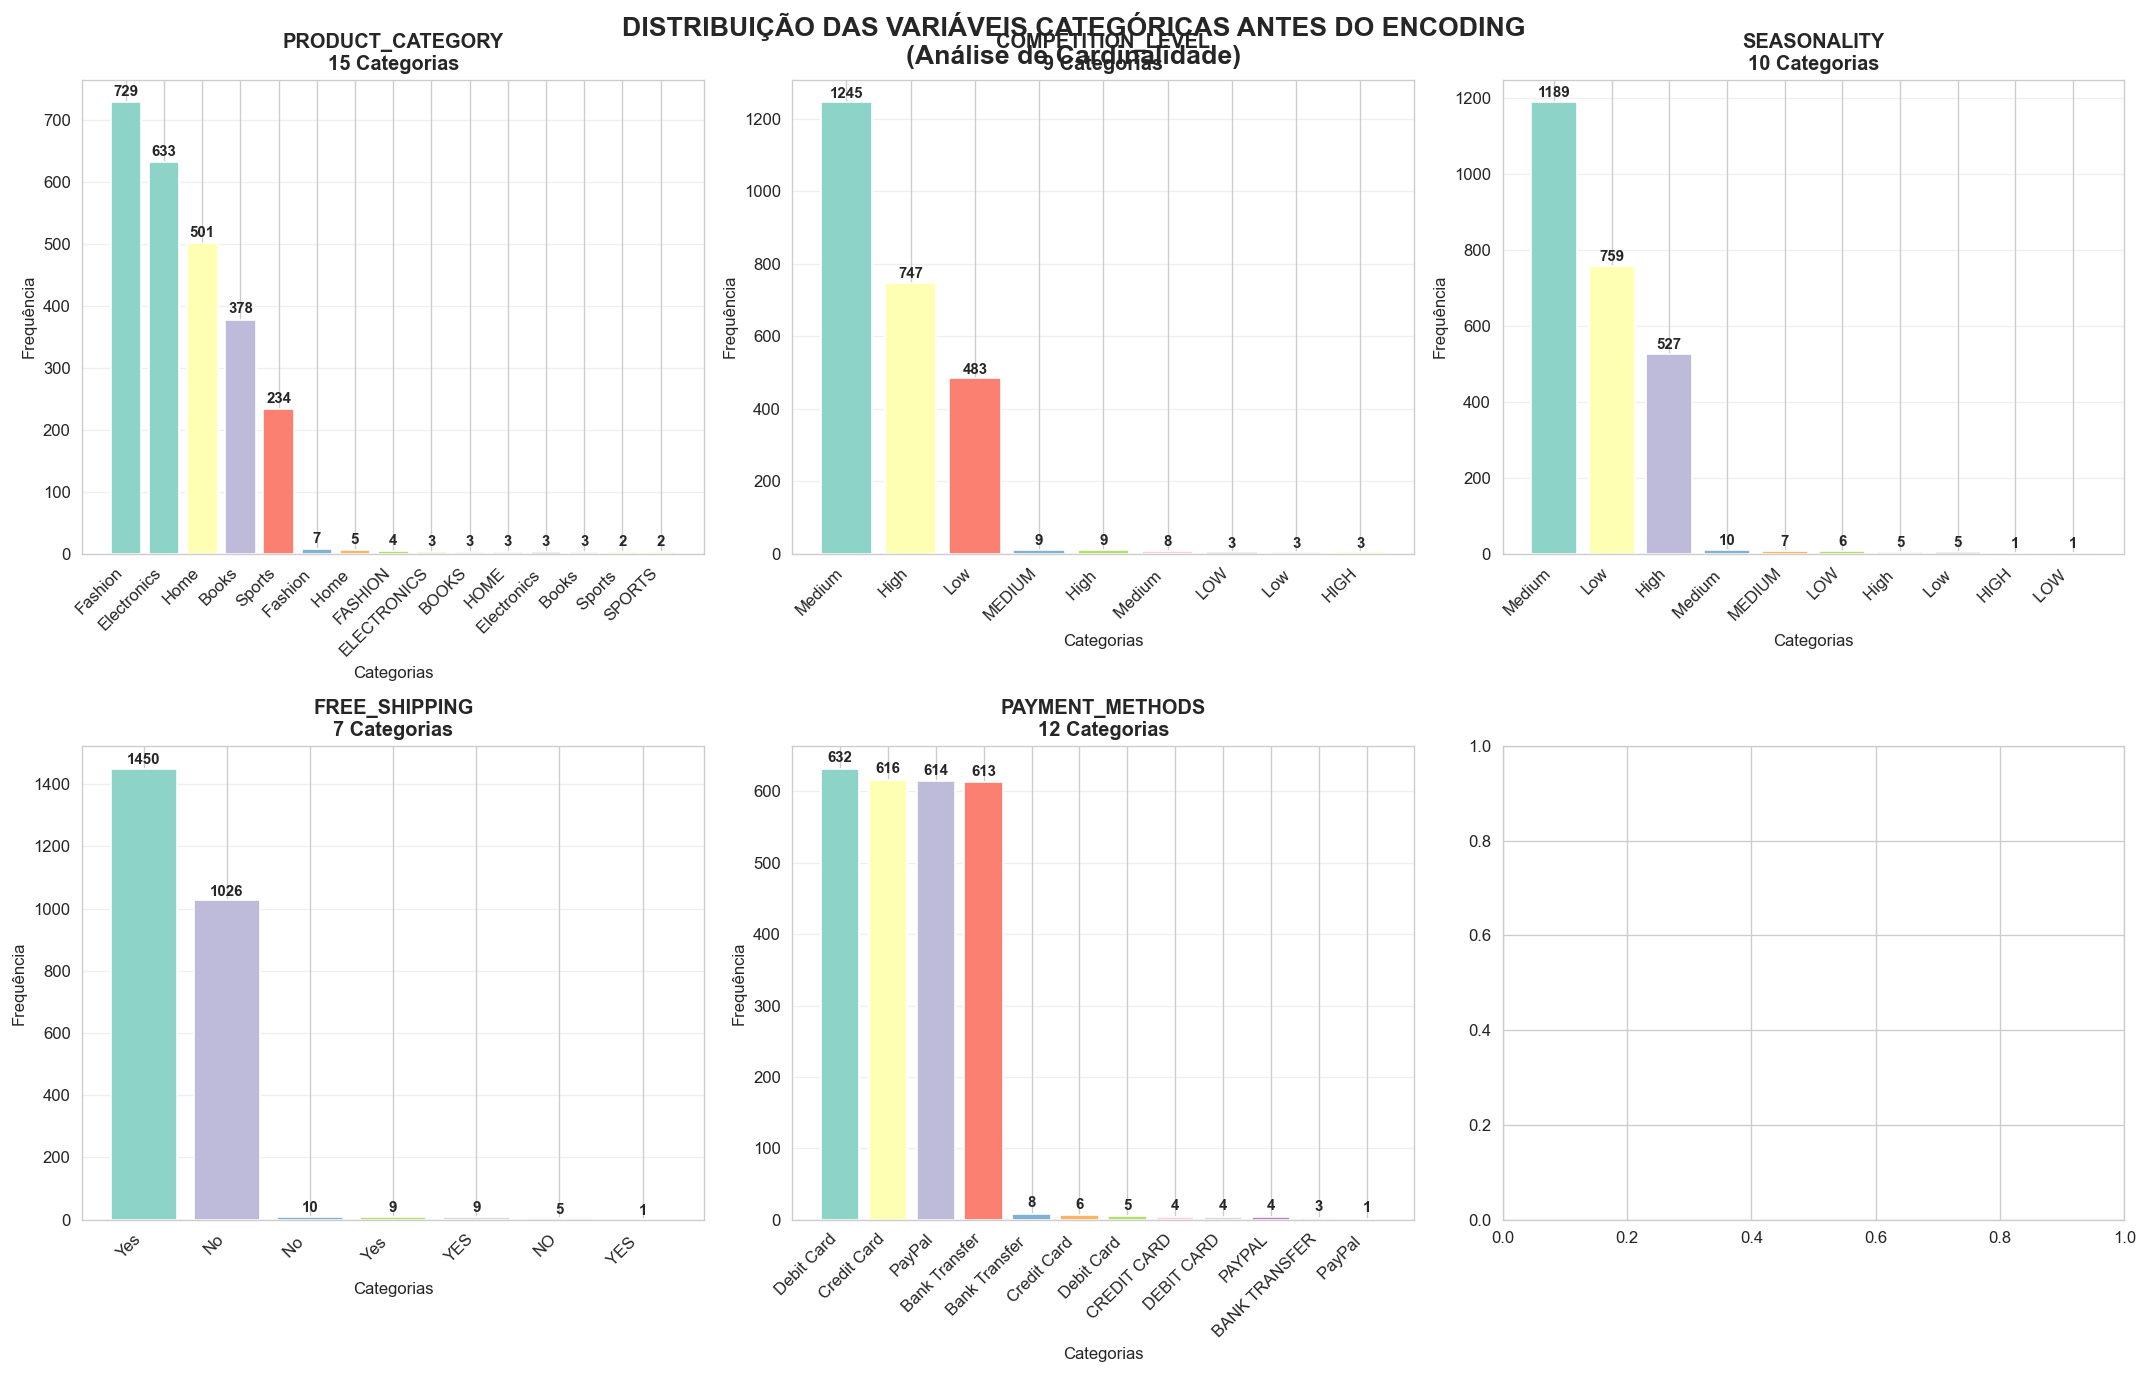

🔄 Aplicando One-Hot Encoding...
📈 Resultado do Encoding:
   • Shape antes: (2510, 17)
   • Shape depois: (2510, 60)
   • Novas colunas criadas: 43

🔍 Primeiras 10 novas colunas criadas:
   1. product_category_  Electronics 
   2. product_category_  Fashion 
   3. product_category_  Home 
   4. product_category_  Sports 
   5. product_category_BOOKS
   6. product_category_Books
   7. product_category_ELECTRONICS
   8. product_category_Electronics
   9. product_category_FASHION
   10. product_category_Fashion

📋 Total de colunas após encoding: 48


In [362]:
print("6. ENCODING DE VARIÁVEIS CATEGÓRICAS")

# Identificar colunas categóricas para encoding
cat_cols_encoding = [col for col in cat_cols if col != 'sale_id']

print(f"🎯 Colunas categóricas para encoding: {cat_cols_encoding}")

# Analisar cardinalidade antes do encoding
print("\n📊 ANÁLISE DE CARDINALIDADE DAS VARIÁVEIS CATEGÓRICAS:")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('DISTRIBUIÇÃO DAS VARIÁVEIS CATEGÓRICAS ANTES DO ENCODING\n(Análise de Cardinalidade)',
             fontsize=16, fontweight='bold', y=0.95)

info_cardinalidade = []

for i, col in enumerate(cat_cols_encoding[:6]):
    value_counts = df_clean[col].value_counts()
    n_categorias = len(value_counts)

    # Gráfico de barras
    bars = axes[i//3, i%3].bar(range(len(value_counts)), value_counts.values,
                              color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
    axes[i//3, i%3].set_title(f'{col.upper()}\n{len(value_counts)} Categorias', fontweight='bold')
    axes[i//3, i%3].set_xlabel('Categorias')
    axes[i//3, i%3].set_ylabel('Frequência')
    axes[i//3, i%3].set_xticks(range(len(value_counts)))
    axes[i//3, i%3].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[i//3, i%3].grid(axis='y', alpha=0.3)

    # Adicionar valores nas barras
    for j, bar in enumerate(bars):
        height = bar.get_height()
        axes[i//3, i%3].text(bar.get_x() + bar.get_width()/2., height + 5,
                            f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

    info_cardinalidade.append({
        'Variável': col,
        'Categorias_Únicas': n_categorias,
        'Categoria_Mais_Frequente': value_counts.index[0],
        'Freq_Categoria_Mais_Frequente': value_counts.iloc[0],
        'Percentual_Mais_Frequente': f'{(value_counts.iloc[0] / len(df_clean)) * 100:.1f}%'
    })

plt.tight_layout()
plt.show()

# Aplicar One-Hot Encoding
print("🔄 Aplicando One-Hot Encoding...")
df_encoded = pd.get_dummies(df_clean, columns=cat_cols_encoding, drop_first=True, prefix=cat_cols_encoding)

print(f"📈 Resultado do Encoding:")
print(f"   • Shape antes: {df_clean.shape}")
print(f"   • Shape depois: {df_encoded.shape}")
print(f"   • Novas colunas criadas: {df_encoded.shape[1] - df_clean.shape[1]}")

# Visualizar novas colunas criadas
novas_colunas_categoricas = [col for col in df_encoded.columns if any(cat_col in col for cat_col in cat_cols_encoding)]

print(f"\n🔍 Primeiras 10 novas colunas criadas:")
for i, col in enumerate(novas_colunas_categoricas[:10]):
    print(f"   {i+1}. {col}")

print(f"\n📋 Total de colunas após encoding: {len(novas_colunas_categoricas)}")

# CÉLULA 8: NORMALIZAÇÃO DE VARIÁVEIS NUMÉRICAS

7. NORMALIZAÇÃO DE VARIÁVEIS NUMÉRICAS
🎯 Colunas para normalização: ['marketing_spend', 'website_traffic', 'conversion_rate', 'avg_product_rating', 'discount_percentage', 'num_products', 'avg_price', 'customer_reviews', 'return_rate', 'mobile_traffic_pct']

📊 DISTRIBUIÇÕES ANTES DA NORMALIZAÇÃO:


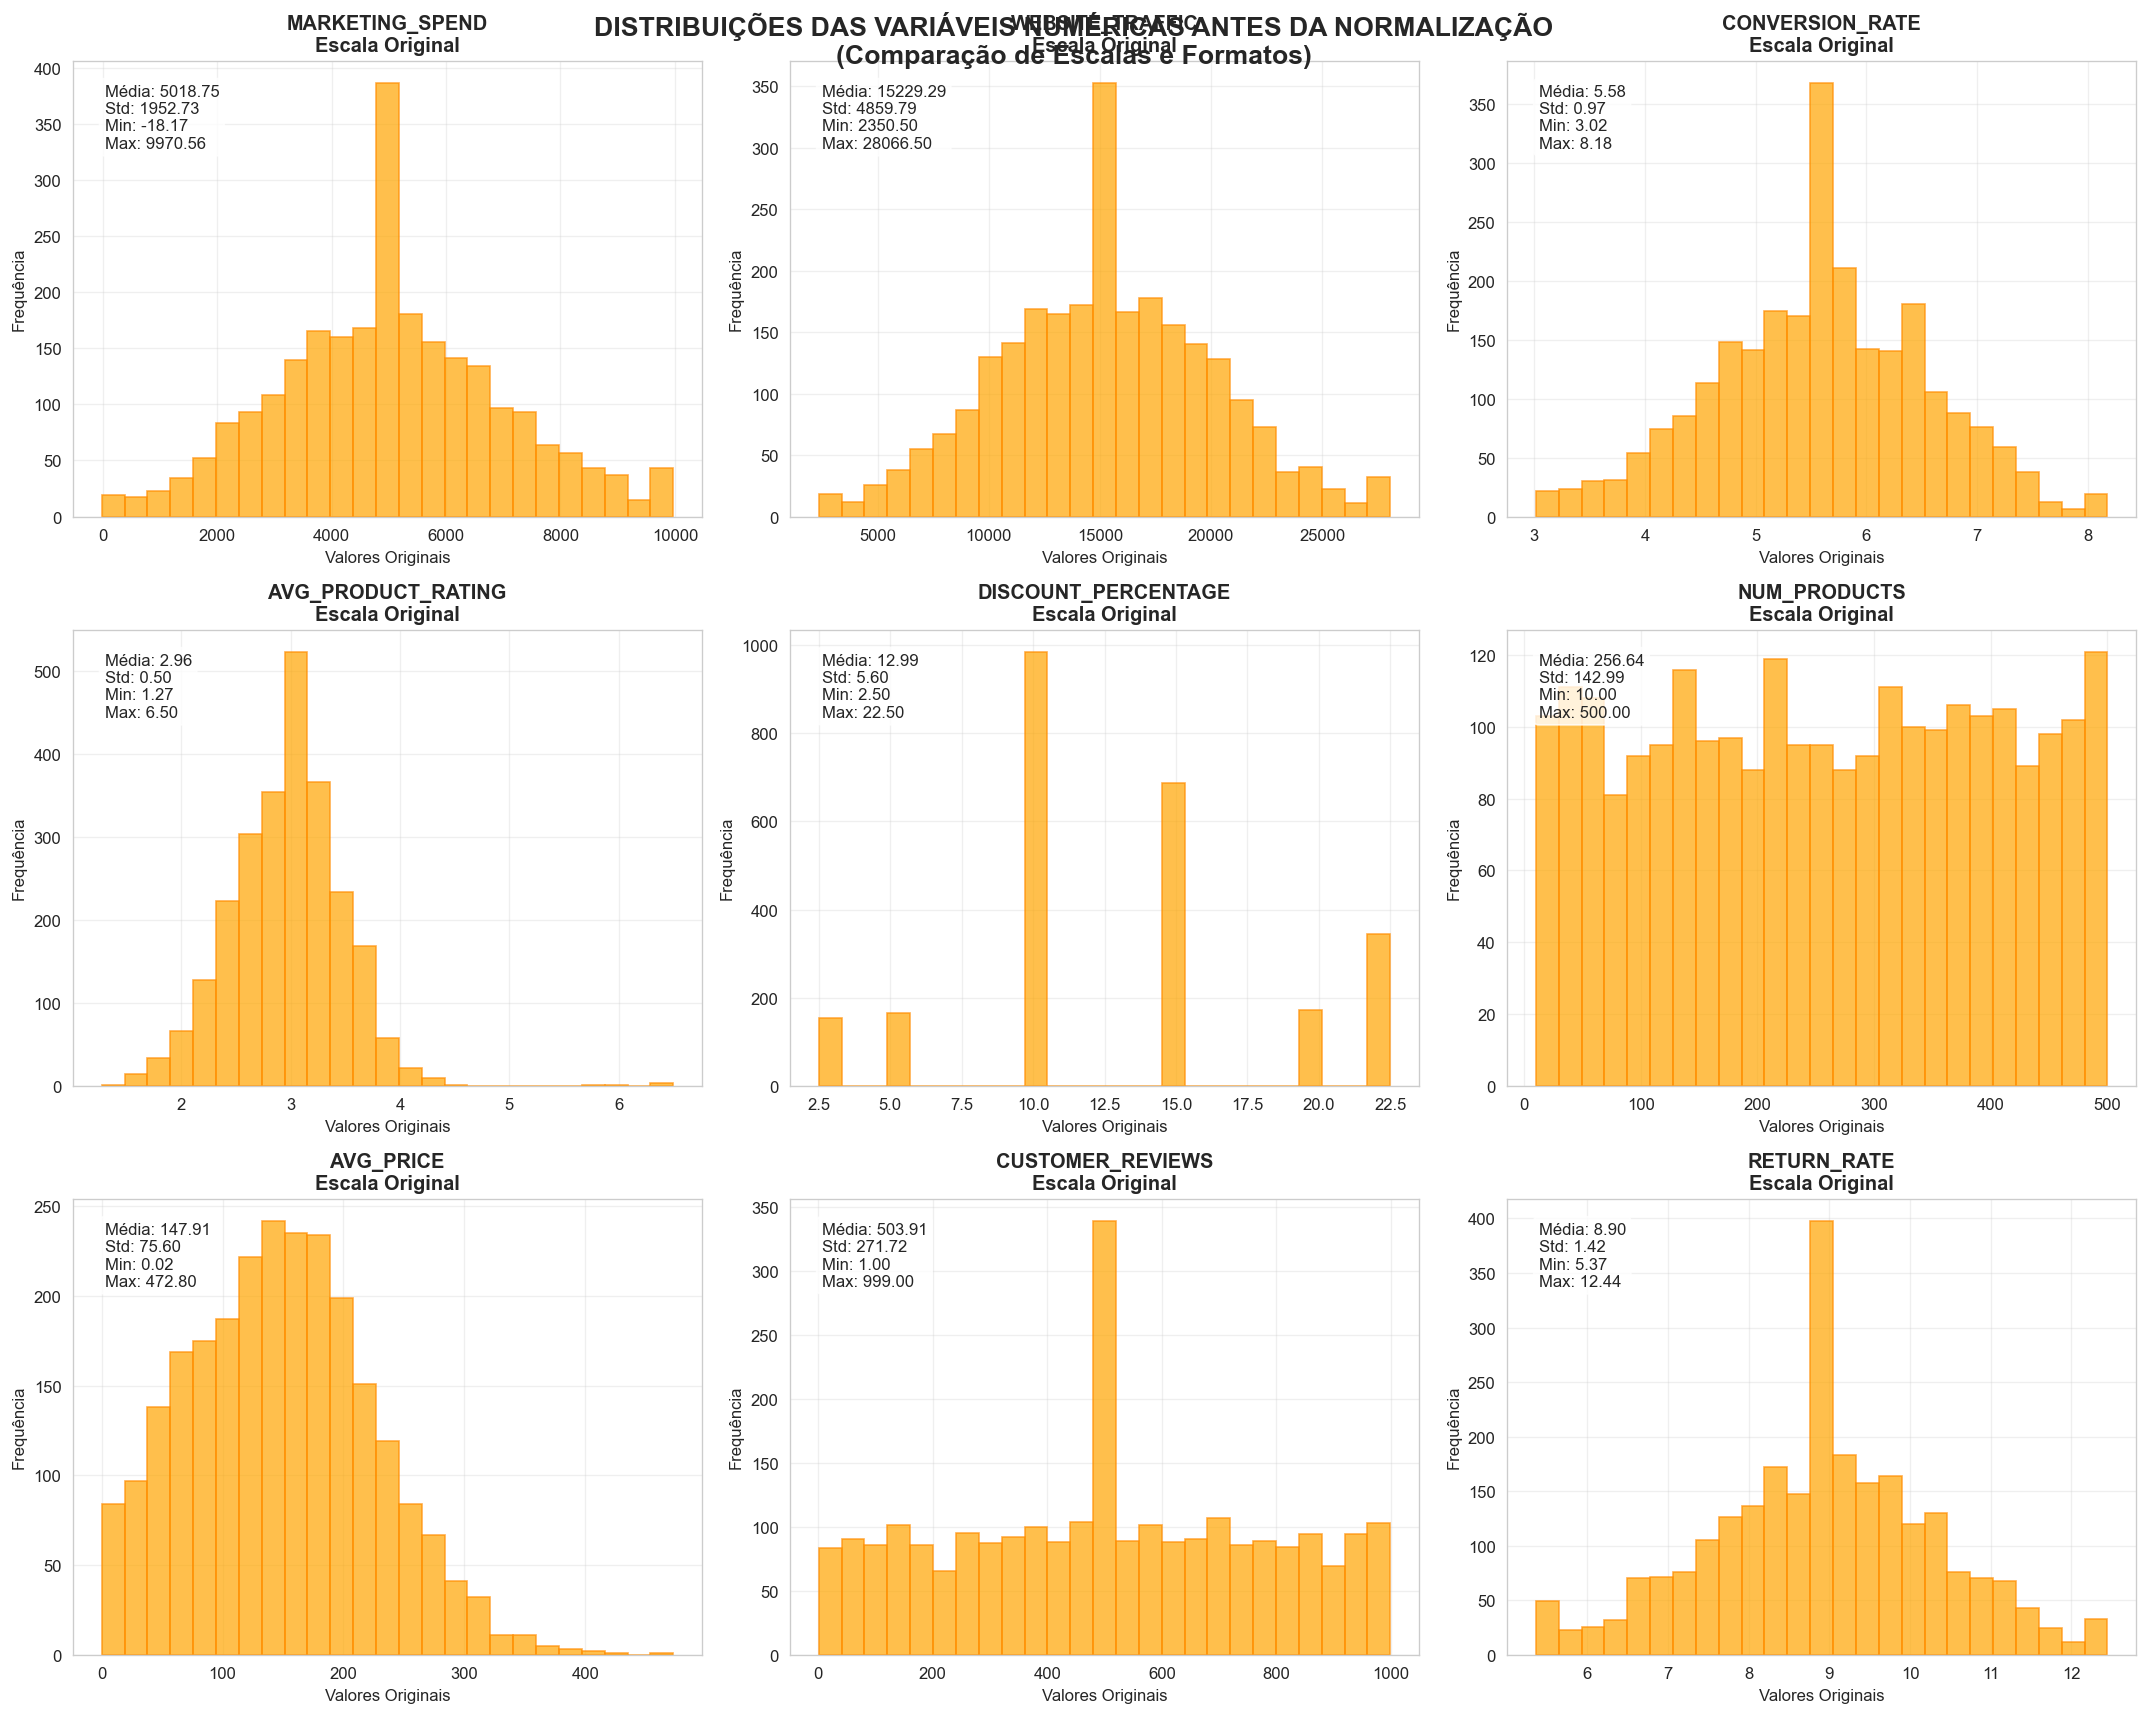

🔄 Aplicando StandardScaler...
✅ Normalização concluída!

📊 DISTRIBUIÇÕES APÓS A NORMALIZAÇÃO (STANDARDSCALER):


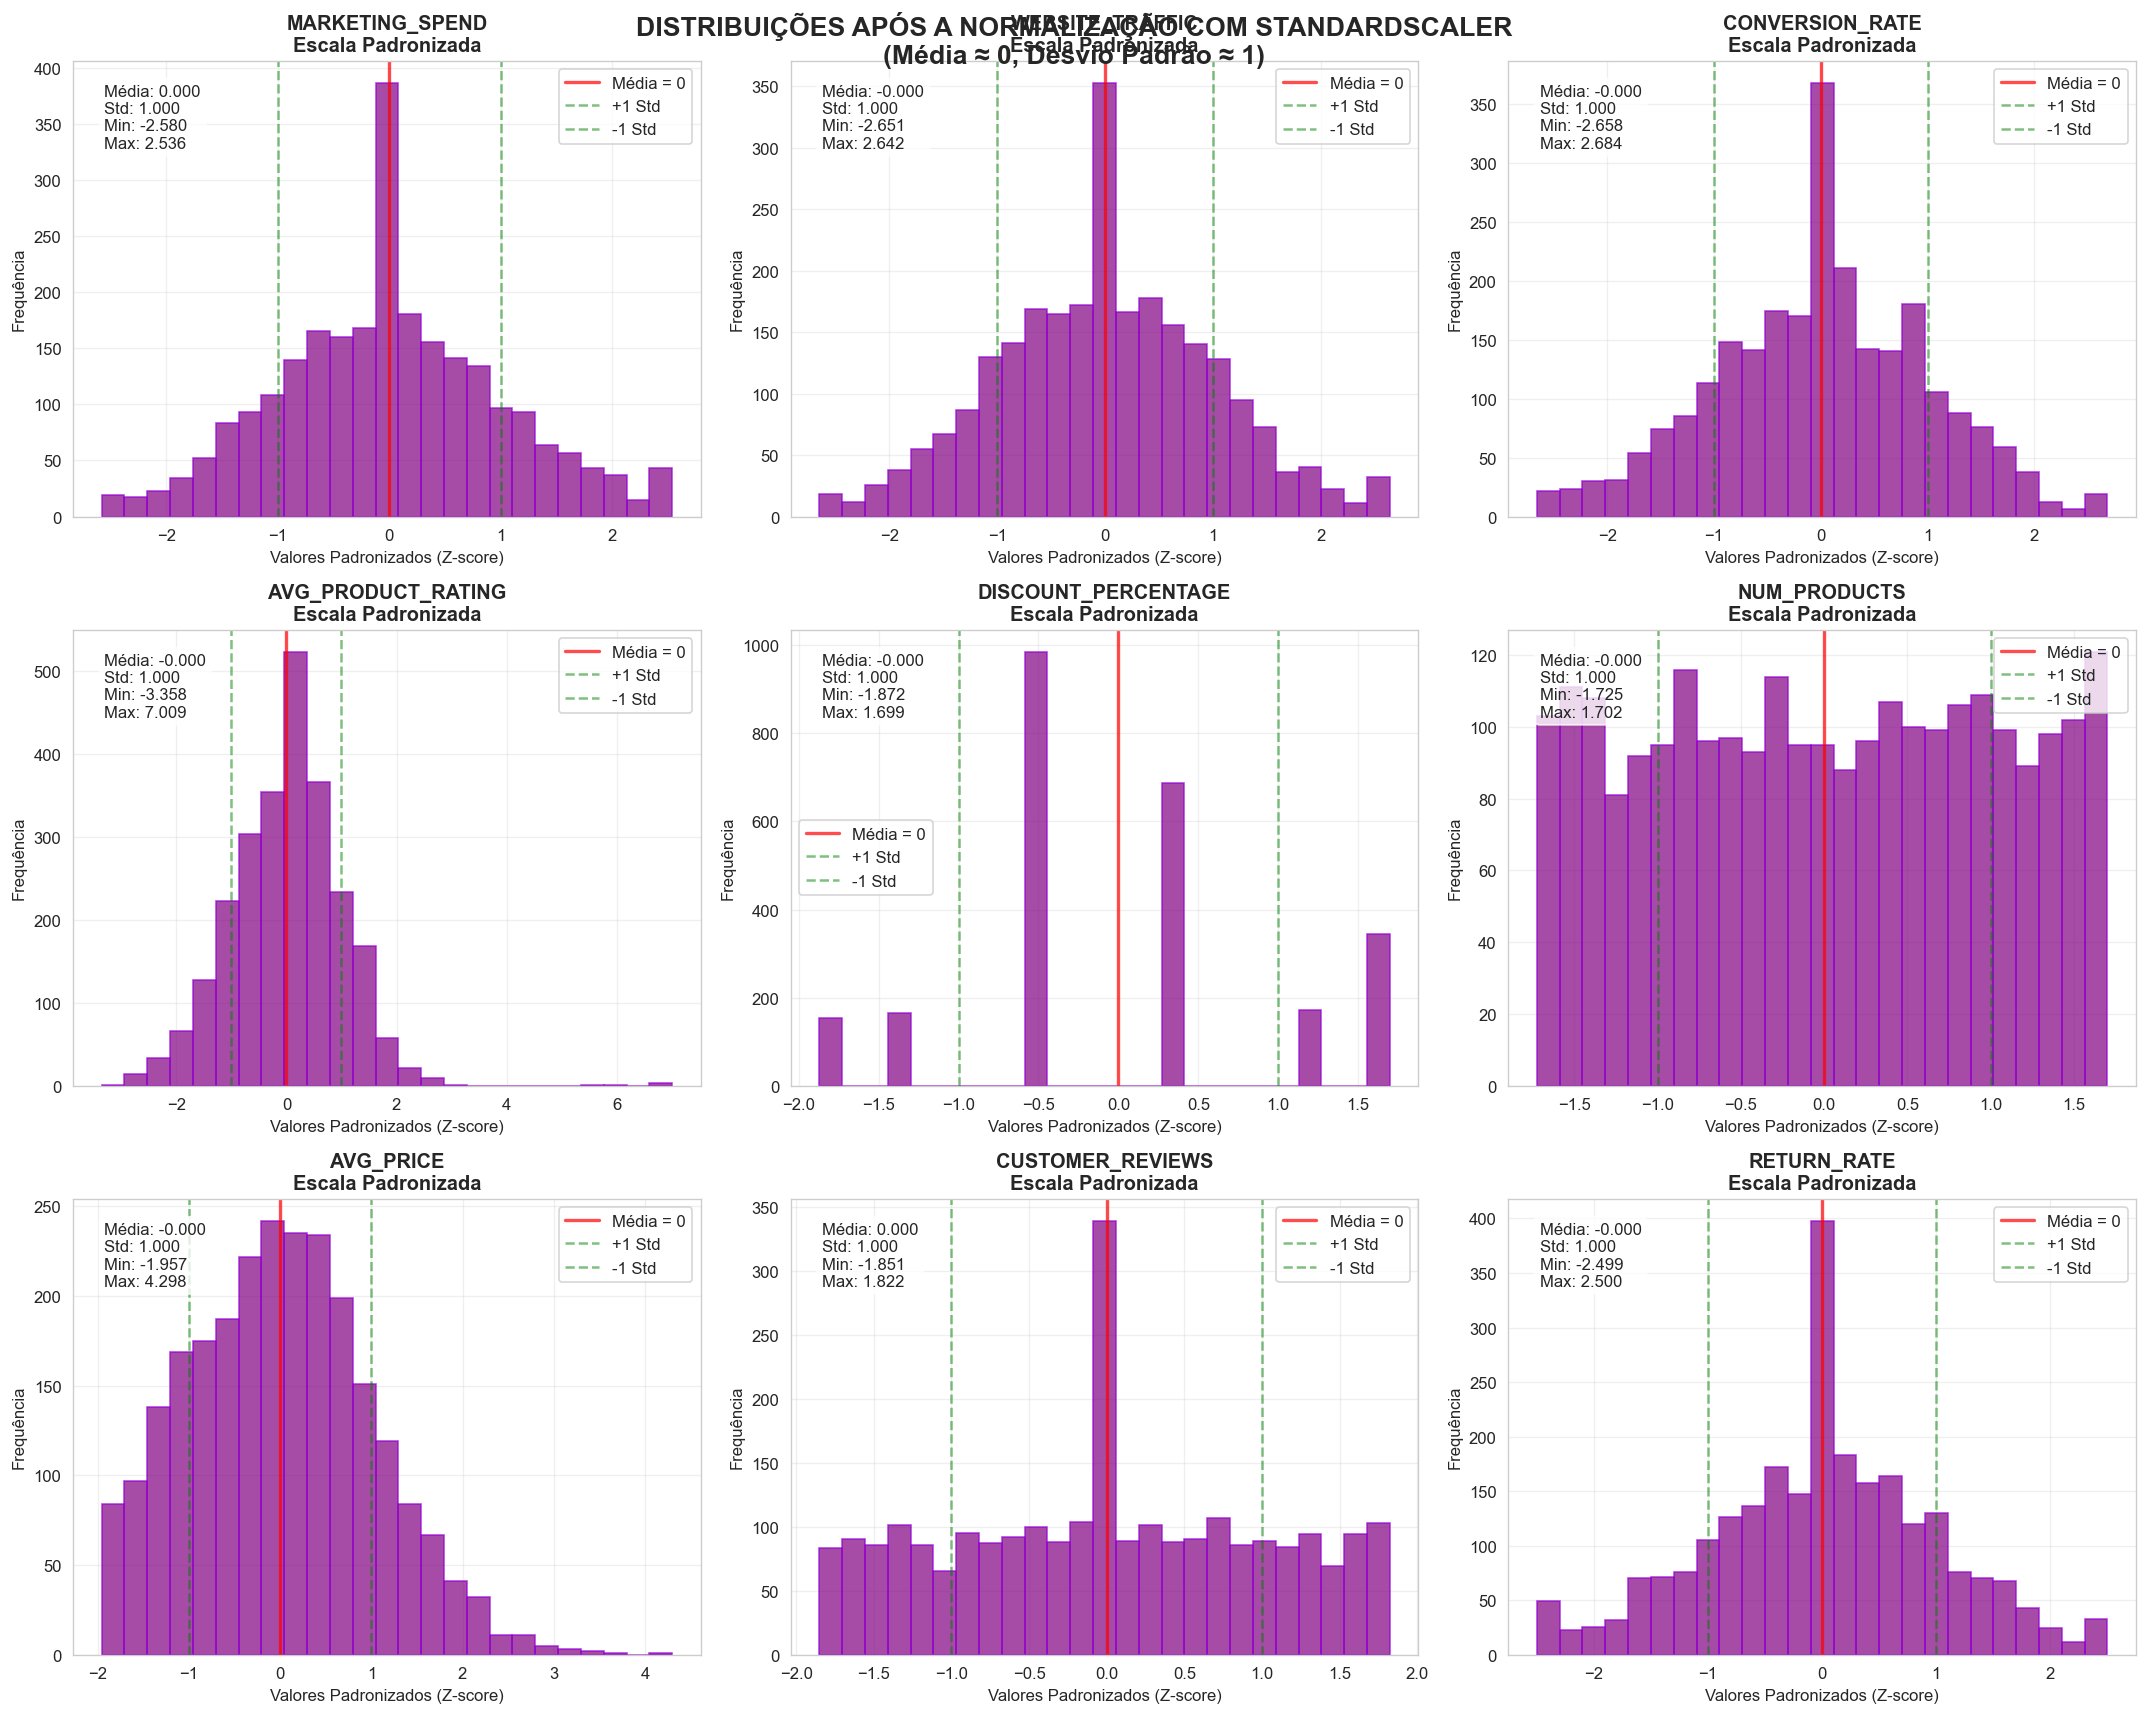


📋 COMPARAÇÃO ESTATÍSTICA: ANTES vs DEPOIS da Normalização


,Coluna,Média_Antes,Média_Depois,Std_Antes,Std_Depois,Variação_Média,Variação_Std
0,marketing_spend,5018.75,0.000,1952.73,1.000,-5018.75,-1951.73
1,website_traffic,15229.29,-0.000,4859.79,1.000,-15229.29,-4858.79
2,conversion_rate,5.58,-0.000,0.97,1.000,-5.58,0.03
3,avg_product_rating,2.96,-0.000,0.50,1.000,-2.96,0.50
4,discount_percentage,12.99,-0.000,5.60,1.000,-12.99,-4.60
5,num_products,256.64,-0.000,142.99,1.000,-256.64,-141.99


In [363]:
print("7. NORMALIZAÇÃO DE VARIÁVEIS NUMÉRICAS")

# Identificar colunas numéricas para normalizar (excluir target)
num_cols_normalizar = [col for col in num_cols if col not in ['monthly_sales', 'sale_id']]

print(f"🎯 Colunas para normalização: {num_cols_normalizar}")

# Visualizar distribuições ANTES da normalização
print("\n📊 DISTRIBUIÇÕES ANTES DA NORMALIZAÇÃO:")

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('DISTRIBUIÇÕES DAS VARIÁVEIS NUMÉRICAS ANTES DA NORMALIZAÇÃO\n(Comparação de Escalas e Formatos)',
             fontsize=16, fontweight='bold', y=0.95)

estatisticas_antes = {}

for i, col in enumerate(num_cols_normalizar[:9]):
    dados = df_encoded[col]

    # Histograma antes
    axes[i//3, i%3].hist(dados, bins=25, alpha=0.7, color='orange', edgecolor='darkorange', linewidth=1)
    axes[i//3, i%3].set_title(f'{col.upper()}\nEscala Original', fontweight='bold')
    axes[i//3, i%3].set_xlabel('Valores Originais')
    axes[i//3, i%3].set_ylabel('Frequência')
    axes[i//3, i%3].grid(alpha=0.3)

    # Adicionar estatísticas
    stats_text = f'Média: {dados.mean():.2f}\nStd: {dados.std():.2f}\nMin: {dados.min():.2f}\nMax: {dados.max():.2f}'
    axes[i//3, i%3].text(0.05, 0.95, stats_text, transform=axes[i//3, i%3].transAxes,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    estatisticas_antes[col] = {
        'Média_Antes': dados.mean(),
        'DesvioPadrao_Antes': dados.std(),
        'Min_Antes': dados.min(),
        'Max_Antes': dados.max()
    }

plt.tight_layout()
plt.show()

# APLICAR NORMALIZAÇÃO
print("🔄 Aplicando StandardScaler...")
scaler = StandardScaler()
df_final = df_encoded.copy()
df_final[num_cols_normalizar] = scaler.fit_transform(df_final[num_cols_normalizar])

print("✅ Normalização concluída!")

# Visualizar distribuições DEPOIS da normalização
print("\n📊 DISTRIBUIÇÕES APÓS A NORMALIZAÇÃO (STANDARDSCALER):")

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('DISTRIBUIÇÕES APÓS A NORMALIZAÇÃO COM STANDARDSCALER\n(Média ≈ 0, Desvio Padrão ≈ 1)',
             fontsize=16, fontweight='bold', y=0.95)

estatisticas_depois = {}

for i, col in enumerate(num_cols_normalizar[:9]):
    dados = df_final[col]

    # Histograma depois
    axes[i//3, i%3].hist(dados, bins=25, alpha=0.7, color='purple', edgecolor='darkviolet', linewidth=1)
    axes[i//3, i%3].set_title(f'{col.upper()}\nEscala Padronizada', fontweight='bold')
    axes[i//3, i%3].set_xlabel('Valores Padronizados (Z-score)')
    axes[i//3, i%3].set_ylabel('Frequência')
    axes[i//3, i%3].grid(alpha=0.3)

    # Adicionar estatísticas
    stats_text = f'Média: {dados.mean():.3f}\nStd: {dados.std():.3f}\nMin: {dados.min():.3f}\nMax: {dados.max():.3f}'
    axes[i//3, i%3].text(0.05, 0.95, stats_text, transform=axes[i//3, i%3].transAxes,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Linhas verticais para média e ±1 std
    axes[i//3, i%3].axvline(0, color='red', linestyle='-', linewidth=2, alpha=0.7, label='Média = 0')
    axes[i//3, i%3].axvline(1, color='green', linestyle='--', alpha=0.5, label='+1 Std')
    axes[i//3, i%3].axvline(-1, color='green', linestyle='--', alpha=0.5, label='-1 Std')
    axes[i//3, i%3].legend()

    estatisticas_depois[col] = {
        'Média_Depois': dados.mean(),
        'DesvioPadrao_Depois': dados.std(),
        'Min_Depois': dados.min(),
        'Max_Depois': dados.max()
    }

plt.tight_layout()
plt.show()

# Comparação estatística
print("\n📋 COMPARAÇÃO ESTATÍSTICA: ANTES vs DEPOIS da Normalização")
comparacao_stats = []
for col in num_cols_normalizar[:6]:  # Mostrar apenas as primeiras 6
    comparacao_stats.append({
        'Coluna': col,
        'Média_Antes': f"{estatisticas_antes[col]['Média_Antes']:.2f}",
        'Média_Depois': f"{estatisticas_depois[col]['Média_Depois']:.3f}",
        'Std_Antes': f"{estatisticas_antes[col]['DesvioPadrao_Antes']:.2f}",
        'Std_Depois': f"{estatisticas_depois[col]['DesvioPadrao_Depois']:.3f}",
        'Variação_Média': f"{(estatisticas_depois[col]['Média_Depois'] - estatisticas_antes[col]['Média_Antes']):.2f}",
        'Variação_Std': f"{(estatisticas_depois[col]['DesvioPadrao_Depois'] - estatisticas_antes[col]['DesvioPadrao_Antes']):.2f}"
    })

df_comparacao = pd.DataFrame(comparacao_stats)
display(df_comparacao)

# CÉLULA 9: FEATURE ENGINEERING

8. FEATURE ENGINEERING - CRIAÇÃO DE NOVAS VARIÁVEIS
🛠️ Criando novas features baseadas no domínio de e-commerce...
✅ marketing_efficiency = monthly_sales / marketing_spend
✅ avg_value_per_product = monthly_sales / num_products
✅ adjusted_conversion = conversion_rate * log(website_traffic)
✅ discount_category = categorização dos descontos

📈 Foram criadas 4 novas features!
   Novas features: ['marketing_efficiency', 'avg_value_per_product', 'adjusted_conversion', 'discount_category']

📊 VISUALIZANDO AS NOVAS FEATURES CRIADAS:


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


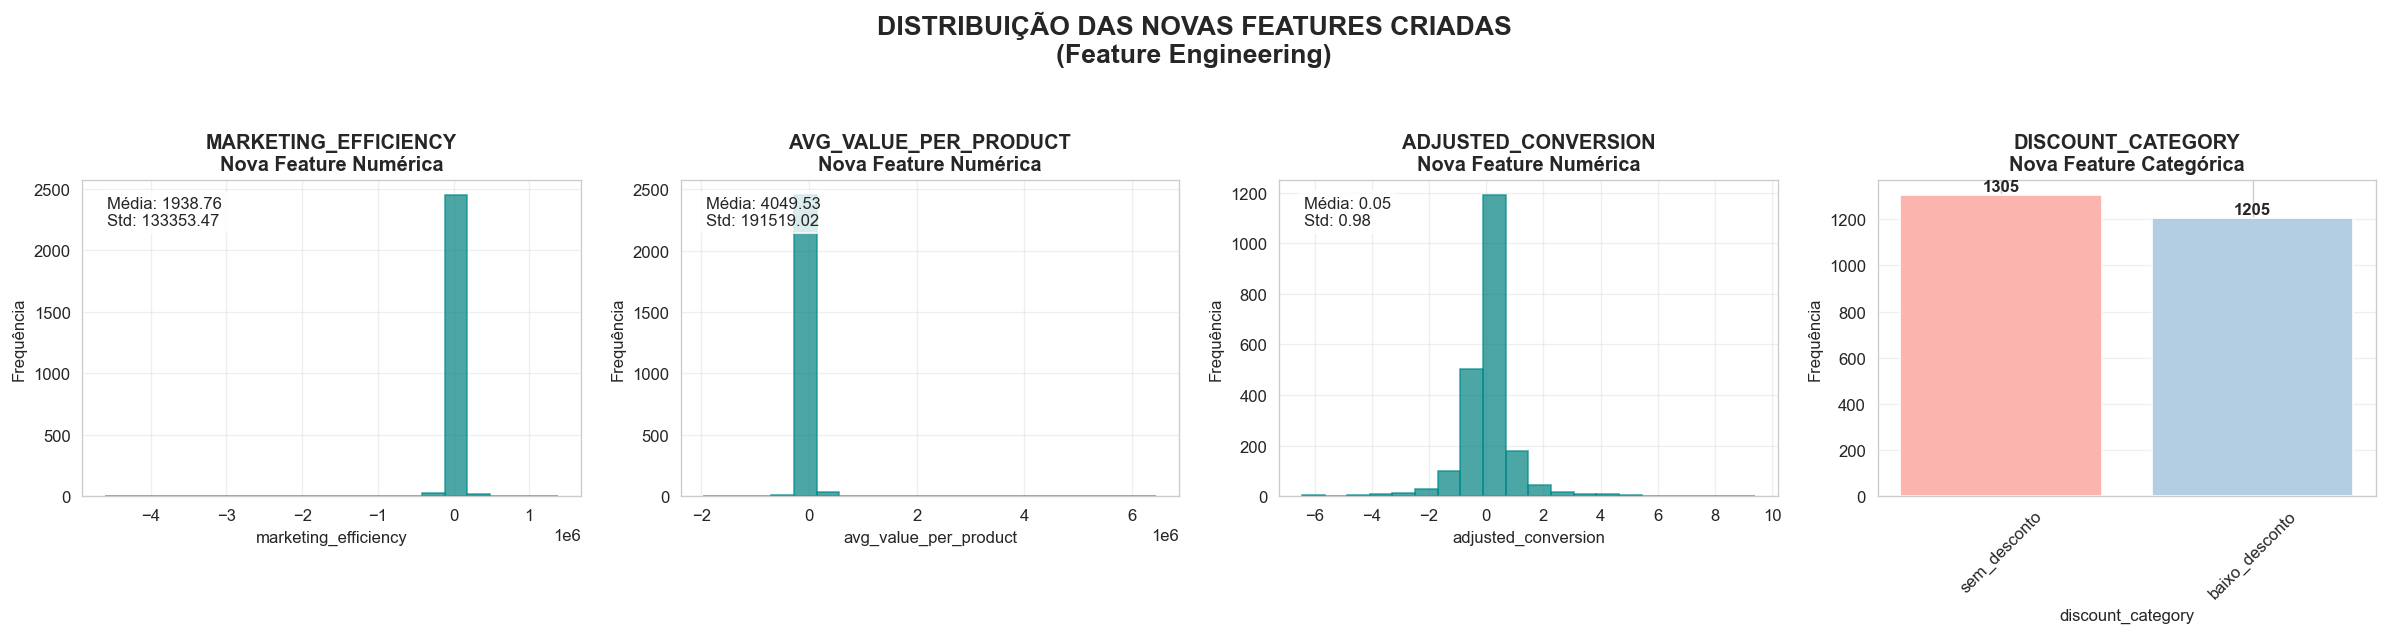


🎯 Dataset final: 2510 linhas × 64 colunas


In [364]:
print("8. FEATURE ENGINEERING - CRIAÇÃO DE NOVAS VARIÁVEIS")

df_engineered = df_final.copy()
novas_features = []

print("🛠️ Criando novas features baseadas no domínio de e-commerce...")

# FEATURE 1: Eficiência de Marketing
if all(col in df_engineered.columns for col in ['monthly_sales', 'marketing_spend']):
    df_engineered['marketing_efficiency'] = df_engineered['monthly_sales'] / (df_engineered['marketing_spend'] + 1)
    novas_features.append('marketing_efficiency')
    print("✅ marketing_efficiency = monthly_sales / marketing_spend")

# FEATURE 2: Valor Médio por Produto
if all(col in df_engineered.columns for col in ['monthly_sales', 'num_products']):
    df_engineered['avg_value_per_product'] = df_engineered['monthly_sales'] / df_engineered['num_products']
    novas_features.append('avg_value_per_product')
    print("✅ avg_value_per_product = monthly_sales / num_products")

# FEATURE 3: Taxa de Conversão Ajustada
if all(col in df_engineered.columns for col in ['conversion_rate', 'website_traffic']):
    df_engineered['adjusted_conversion'] = df_engineered['conversion_rate'] * np.log1p(df_engineered['website_traffic'])
    novas_features.append('adjusted_conversion')
    print("✅ adjusted_conversion = conversion_rate * log(website_traffic)")

# FEATURE 4: Categorização de Desconto
if 'discount_percentage' in df_engineered.columns:
    conditions = [
        df_engineered['discount_percentage'] == 0,
        (df_engineered['discount_percentage'] > 0) & (df_engineered['discount_percentage'] <= 10),
        (df_engineered['discount_percentage'] > 10) & (df_engineered['discount_percentage'] <= 25),
        df_engineered['discount_percentage'] > 25
    ]
    choices = ['sem_desconto', 'baixo_desconto', 'medio_desconto', 'alto_desconto']
    df_engineered['discount_category'] = np.select(conditions, choices, default='sem_desconto')
    novas_features.append('discount_category')
    print("✅ discount_category = categorização dos descontos")

print(f"\n📈 Foram criadas {len(novas_features)} novas features!")
print(f"   Novas features: {novas_features}")

# Visualizar as novas features
if novas_features:
    print("\n📊 VISUALIZANDO AS NOVAS FEATURES CRIADAS:")

    n_features = len(novas_features)
    fig, axes = plt.subplots(1, n_features, figsize=(5*n_features, 5))
    if n_features == 1:
        axes = [axes]

    fig.suptitle('DISTRIBUIÇÃO DAS NOVAS FEATURES CRIADAS\n(Feature Engineering)',
                 fontsize=16, fontweight='bold', y=1.05)

    for i, feature in enumerate(novas_features):
        if feature != 'discount_category':  # Features numéricas
            axes[i].hist(df_engineered[feature].dropna(), bins=20, alpha=0.7,
                        color='teal', edgecolor='darkcyan', linewidth=1)
            axes[i].set_title(f'{feature.upper()}\nNova Feature Numérica', fontweight='bold')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequência')
            axes[i].grid(alpha=0.3)

            # Estatísticas
            stats = df_engineered[feature].describe()
            stats_text = f'Média: {stats["mean"]:.2f}\nStd: {stats["std"]:.2f}'
            axes[i].text(0.05, 0.95, stats_text, transform=axes[i].transAxes,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        else:  # Feature categórica
            value_counts = df_engineered[feature].value_counts()
            bars = axes[i].bar(value_counts.index, value_counts.values,
                              color=plt.cm.Pastel1(range(len(value_counts))))
            axes[i].set_title(f'{feature.upper()}\nNova Feature Categórica', fontweight='bold')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequência')
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].grid(axis='y', alpha=0.3)

            # Adicionar valores nas barras
            for j, bar in enumerate(bars):
                height = bar.get_height()
                axes[i].text(bar.get_x() + bar.get_width()/2., height + 5,
                            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

print(f"\n🎯 Dataset final: {df_engineered.shape[0]} linhas × {df_engineered.shape[1]} colunas")

# CÉLULA 10: SALVAMENTO DO SCALER

In [365]:
print("9. SALVAMENTO DO SCALER (Conforme solicitado na Normalização)")

# Criar diretório se não existir
import os
os.makedirs('models', exist_ok=True)

# Salvar o scaler (ÚNICA coisa explicitamente pedida)
joblib.dump(scaler, 'models/scaler.pkl')
print("✅ Scaler salvo: 'models/scaler.pkl'")
print("   📝 Conforme solicitado: 'Salve o scaler... joblib.dump(scaler, models/scaler.pkl)'")

# OPCIONAL: Salvar dataset processado (para referência, mas não foi pedido)
os.makedirs('data/processed', exist_ok=True)

9. SALVAMENTO DO SCALER (Conforme solicitado na Normalização)
✅ Scaler salvo: 'models/scaler.pkl'
   📝 Conforme solicitado: 'Salve o scaler... joblib.dump(scaler, models/scaler.pkl)'


# CÉLULA 11: RESUMO FINAL VISUAL

10. RESUMO VISUAL DO PRÉ-PROCESSAMENTO


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13636\587172709.py:62: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


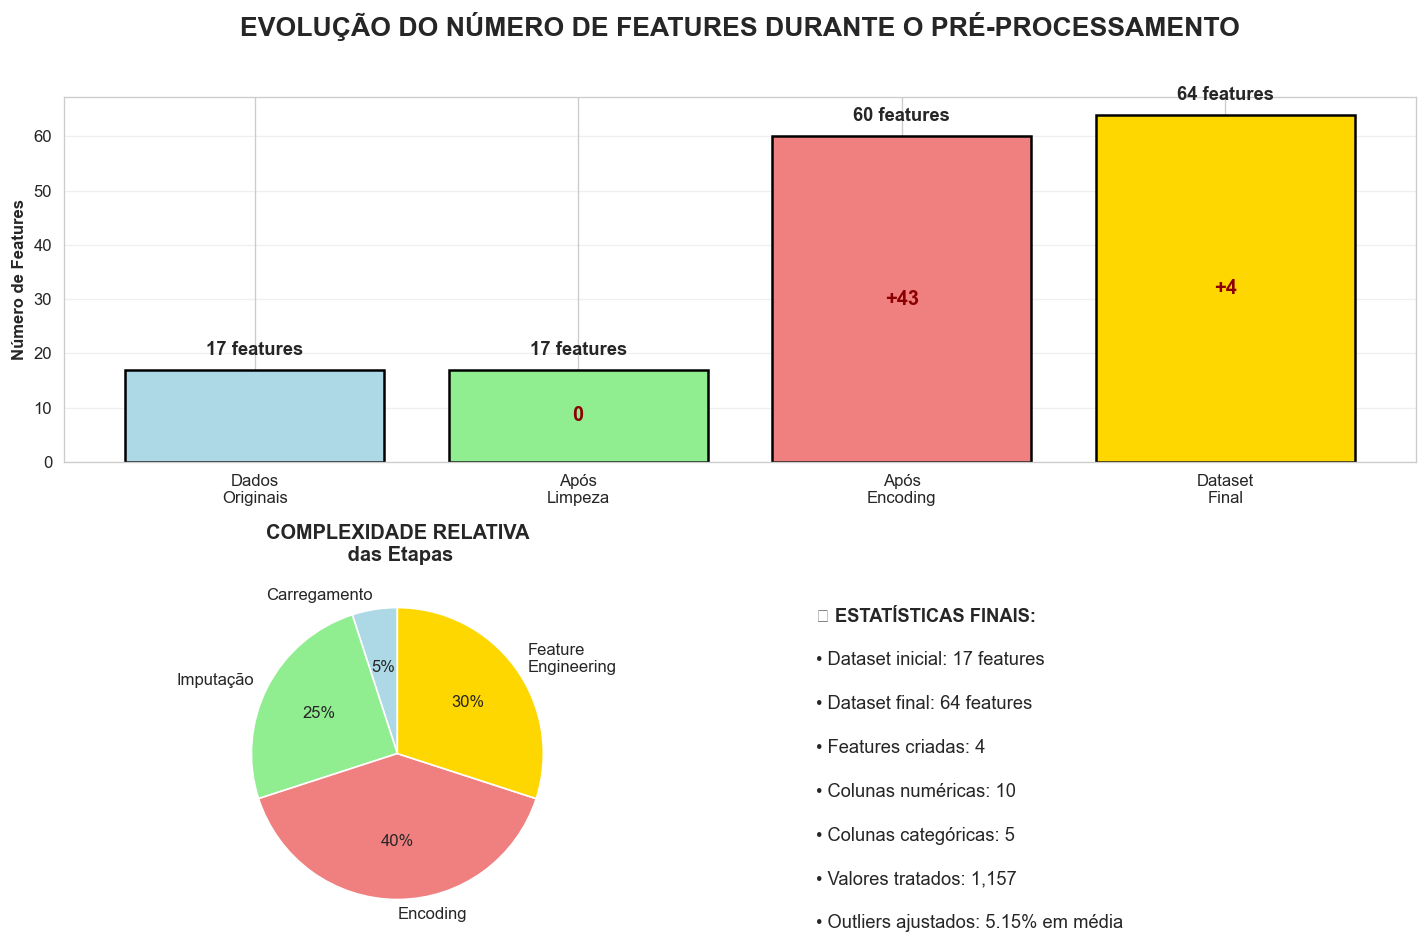

🎉 PRÉ-PROCESSAMENTO CONCLUÍDO!
📁 Arquivos gerados disponíveis nos diretórios 'data/processed/' e 'models/'


In [366]:
print("10. RESUMO VISUAL DO PRÉ-PROCESSAMENTO")

# Criar visualização resumo do processo
etapas = ['Dados\nOriginais', 'Após\nLimpeza', 'Após\nEncoding', 'Dataset\nFinal']
colunas_por_etapa = [df.shape[1], df_clean.shape[1], df_encoded.shape[1], df_engineered.shape[1]]
processos = ['Carregamento', 'Imputação', 'Encoding', 'Feature\nEngineering']

plt.figure(figsize=(12, 8))

# Gráfico de evolução
plt.subplot(2, 1, 1)
bars = plt.bar(etapas, colunas_por_etapa,
               color=['lightblue', 'lightgreen', 'lightcoral', 'gold'],
               edgecolor='black', linewidth=1.5)

plt.title('EVOLUÇÃO DO NÚMERO DE FEATURES DURANTE O PRÉ-PROCESSAMENTO\n',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Número de Features', fontweight='bold')

# Adicionar valores e porcentagens nas barras
for i, (bar, cols) in enumerate(zip(bars, colunas_por_etapa)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{cols} features', ha='center', va='bottom', fontweight='bold', fontsize=11)

    if i > 0:
        variacao = cols - colunas_por_etapa[i-1]
        sinal = '+' if variacao > 0 else ''
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
                 f'{sinal}{variacao}', ha='center', va='center',
                 fontweight='bold', fontsize=12, color='darkred')

plt.grid(axis='y', alpha=0.3)

# Gráfico de pizza do processo
plt.subplot(2, 2, 3)
tamanhos = [5, 25, 40, 30]  # Representação visual da complexidade
colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold']
plt.pie(tamanhos, labels=processos, colors=colors, autopct='%1.0f%%', startangle=90)
plt.title('COMPLEXIDADE RELATIVA\n das Etapas', fontweight='bold')

percentuais_float = [float(x.split('%')[0]) for x in df_resumo_outliers['Percentual_Outliers']]
media_outliers_float = sum(percentuais_float) / len(df_resumo_outliers)

# Estatísticas finais
plt.subplot(2, 2, 4)
plt.axis('off')
estatisticas_texto = [
    "📊 ESTATÍSTICAS FINAIS:",
    f"• Dataset inicial: {df.shape[1]} features",
    f"• Dataset final: {df_engineered.shape[1]} features",
    f"• Features criadas: {len(novas_features)}",
    f"• Colunas numéricas: {len(num_cols_normalizar)}",
    f"• Colunas categóricas: {len(cat_cols_encoding)}",
    f"• Valores tratados: {missing_data.sum():,}",
    f"• Outliers ajustados: {media_outliers_float:.2f}% em média"
]

for i, linha in enumerate(estatisticas_texto):
    plt.text(0.1, 0.9 - i*0.12, linha, fontsize=11, fontweight='bold' if i == 0 else 'normal',
             transform=plt.gca().transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

print("🎉 PRÉ-PROCESSAMENTO CONCLUÍDO!")
print("📁 Arquivos gerados disponíveis nos diretórios 'data/processed/' e 'models/'")

# Etava 3: Implementação do Modelo Baseline (Regressão Linear)

In [367]:
# --- 1. IMPORTAÇÕES E CONFIGURAÇÕES ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib # Para salvar o modelo

In [368]:
# Configuração de estilo e DPI para gráficos de alta qualidade
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10, 6)

# Carrega o DataFrame
try:
    df = pd.read_csv('ecommerce_sales.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'ecommerce_sales.csv' não foi encontrado.")
    raise



# 2. PRÉ-PROCESSAMENTO: CRIAÇÃO DO DF_CLEAN

2.1. Imputação de Valores Faltantes

In [381]:
df_clean = df.copy() 

num_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_clean.select_dtypes(include="object").columns.tolist()

# Imputação Numérica (Mediana)
for col in num_cols:
    if df_clean[col].isnull().any():
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Imputação Categórica (Moda)
for col in cat_cols:
    if df_clean[col].isnull().any():
        if col != 'sale_id': # Não imputar em colunas que podem ser identificadores
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())
            
print("✅ Dados limpos e prontos para a modelagem (df_clean).")

✅ Dados limpos e prontos para a modelagem (df_clean).


# 3. ENGENHARIA DE FEATURES (ENCODING E SCALING)

3.1. Separar X (features) e y (target)

In [370]:
X = df_clean.drop(['monthly_sales', 'sale_id'], axis=1) # Excluir target e ID
y = df_clean['monthly_sales']

3.2. Encoding (One-Hot Encoding para Linear Regression)

In [371]:
X = pd.get_dummies(X, drop_first=True)

3.3. Scaling (Normalização)

In [372]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(f"✅ Features preparadas: {X_scaled.shape[1]} colunas após encoding e scaling.")

✅ Features preparadas: 58 colunas após encoding e scaling.


# 4. DIVISÃO DOS DADOS (60% TREINO, 20% VALIDAÇÃO, 20% TESTE)

4.1. 80% Treino/Validação | 20% Teste

In [373]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42)

4.2. 60% Treino | 20% Validação (25% de 80% = 20%)

In [374]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)

print(f"✅ Divisão dos Dados:")
print(f"   • Treino (60%): {X_train.shape[0]} amostras")
print(f"   • Validação (20%): {X_val.shape[0]} amostras")
print(f"   • Teste (20%): {X_test.shape[0]} amostras (Guardado para Etapa 5!)")

✅ Divisão dos Dados:
   • Treino (60%): 1506 amostras
   • Validação (20%): 502 amostras
   • Teste (20%): 502 amostras (Guardado para Etapa 5!)


# 5. MODELAGEM E TREINAMENTO

In [375]:
# Cria e treina o Modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

print("\n✅ Modelo Baseline (Regressão Linear) treinado com sucesso!")


✅ Modelo Baseline (Regressão Linear) treinado com sucesso!


# 6. AVALIAÇÃO DO MODELO

In [376]:
def avaliar_modelo(X_set, y_true, nome_set):
    """Faz previsões e calcula métricas R², RMSE, MAE e MSE."""
    y_pred = model.predict(X_set)
    
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    return {
        'Conjunto': nome_set,
        'R²': f'{r2:.4f}',
        'RMSE': f'{rmse:.2f}',
        'MAE': f'{mae:.2f}',
        'MSE': f'{mse:.2f}'
    }

# Calcular métricas para Treino e Validação
metricas_treino = avaliar_modelo(X_train, y_train, 'Treino')
metricas_val = avaliar_modelo(X_val, y_val, 'Validação')

df_metricas = pd.DataFrame([metricas_treino, metricas_val])

# 7. VISUALIZAÇÕES E IMPORTÂNCIA DAS FEATURES

7.1. IMPORTÂNCIA DAS FEATURES (COEFICIENTES)

In [377]:
print("\n--- 🔎 Top 3 Features Mais Importantes (Coeficientes Absolutos) ---")
feature_importance = pd.Series(model.coef_, index=X_train.columns)
top_features = feature_importance.abs().sort_values(ascending=False).head(5)
print(top_features)


--- 🔎 Top 3 Features Mais Importantes (Coeficientes Absolutos) ---
free_shipping_No                580.624899
free_shipping_Yes               560.359941
discount_percentage             393.385686
product_category_Fashion        235.187929
product_category_Electronics    233.343767
dtype: float64


7.2. Gráfico 1: Predições vs. Valores Reais (Validação)

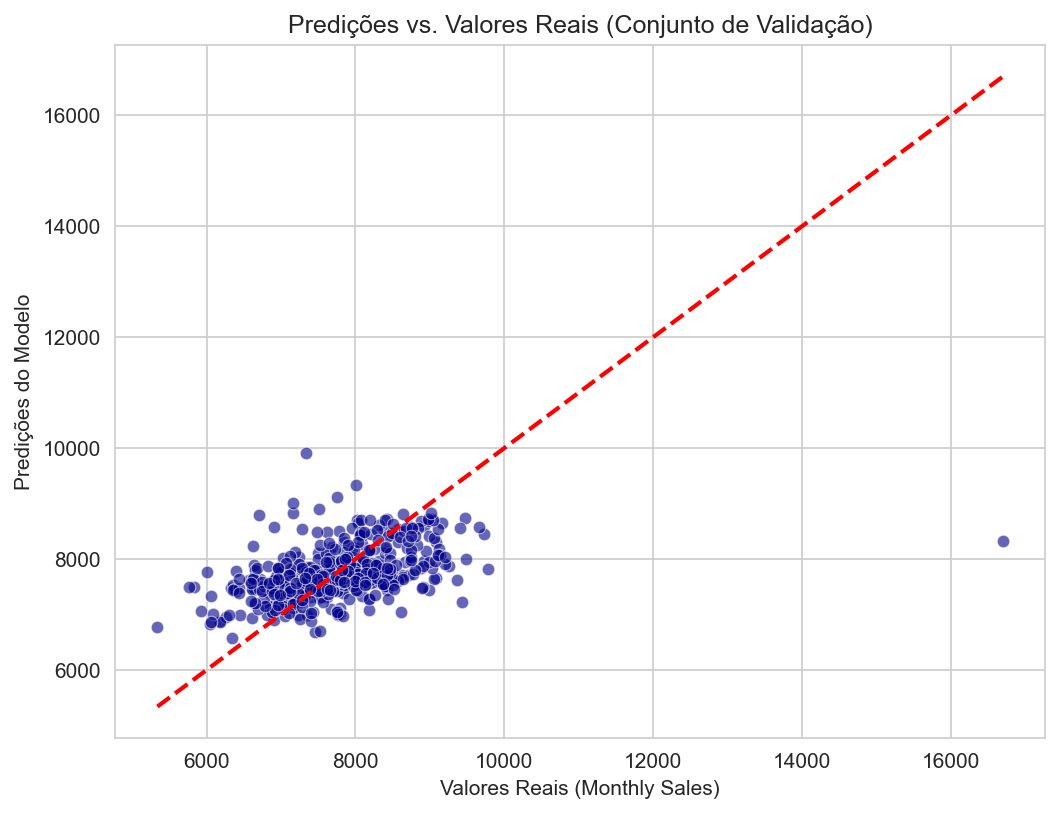

Verificar se as previsões do modelo (y_val_pred) se alinham com os valores verdadeiros do conjunto de validação (y_val).


In [378]:
y_val_pred = model.predict(X_val)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6, color='darkblue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title('Predições vs. Valores Reais (Conjunto de Validação)', fontsize=12)
plt.xlabel('Valores Reais (Monthly Sales)')
plt.ylabel('Predições do Modelo')
plt.show()

print ('Verificar se as previsões do modelo (y_val_pred) se alinham com os valores verdadeiros do conjunto de validação (y_val).')

7.3. Gráfico 2: Distribuição dos Resíduos (Validação)

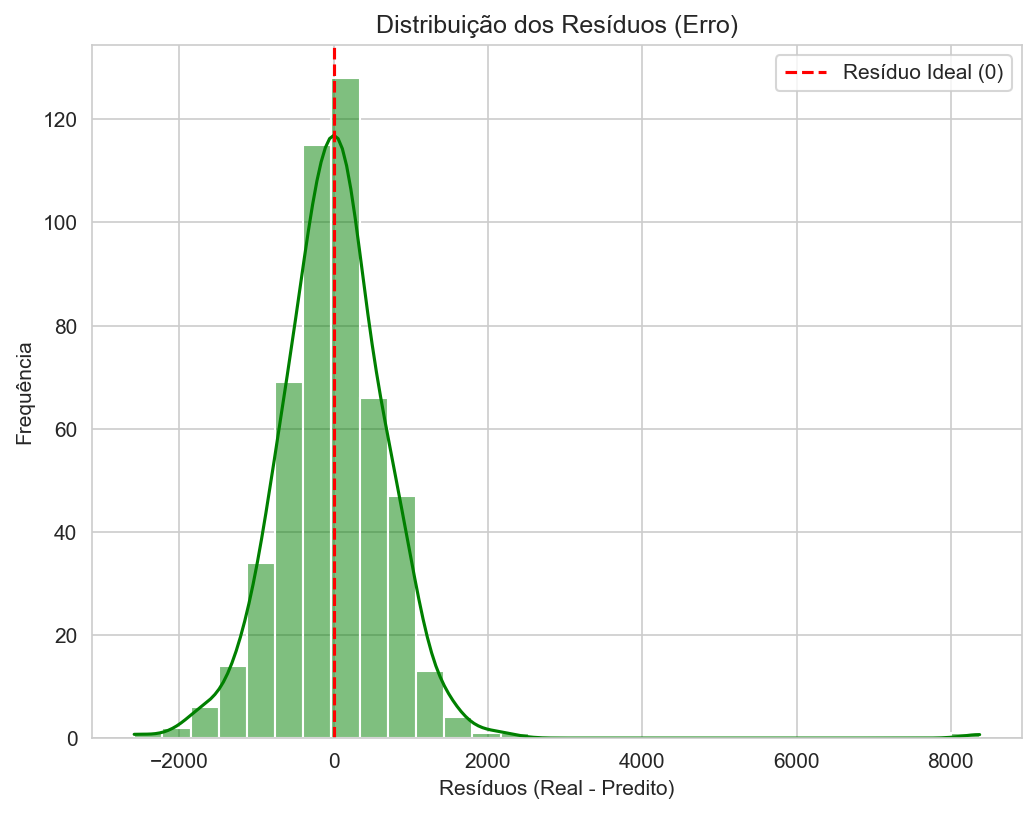

In [379]:
residuos = y_val - y_val_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuos, bins=30, kde=True, color='green')
plt.axvline(0, color='red', linestyle='--', label='Resíduo Ideal (0)')
plt.title('Distribuição dos Resíduos (Erro)', fontsize=12)
plt.xlabel('Resíduos (Real - Predito)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# 8. SALVAMENTO DO MODELO (CHECKLIST)

In [380]:
joblib.dump(model, 'modelo_baseline_rl.pkl')
joblib.dump(scaler, 'scaler_rl.pkl') # Salva o scaler para usar nos dados de teste
print("\n✅ Modelo e Scaler salvos como 'modelo_baseline_rl.pkl' e 'scaler_rl.pkl'.")


✅ Modelo e Scaler salvos como 'modelo_baseline_rl.pkl' e 'scaler_rl.pkl'.
